## Importing the Required libraries

In [1]:
#pip install dython
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dython import nominal
import warnings
warnings.filterwarnings('ignore')

### Loading Training and Testing dataset into df_train,df_test DataFrames

In [2]:
from google.colab import drive
drive.mount('/content/drive')

data1 = pd.read_csv('train.csv')
data2=pd.read_csv('train_label.csv',names=['Total_booking'])
data3=pd.read_csv('test.csv')
data4=pd.read_csv('test_label.csv',names=['Total_booking'])

df_train=pd.concat([data1,data2],axis=1)
df_test=pd.concat([data3,data4],axis=1)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184


In [4]:
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,256
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,87
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,11
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,84
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,668


## Analyzing the dataset

###  Check the shape of training and testing dataset

In [5]:
print(df_train.shape,df_test.shape)

(8708, 10) (2178, 10)


#### We can observe that training dataset has 8708 rows and 10 columns while testing dataset has 2178 rows and 10 columns

### Print the datatype of each column

In [6]:
df_train.dtypes

datetime          object
season            object
holiday            int64
workingday         int64
weather           object
temp             float64
atemp            float64
humidity           int64
windspeed        float64
Total_booking      int64
dtype: object

In [7]:
df_test.dtypes

datetime          object
season            object
holiday            int64
workingday         int64
weather           object
temp             float64
atemp            float64
humidity           int64
windspeed        float64
Total_booking      int64
dtype: object

#### We can observe that there are 4 columns of int and 3 columns of float and 2 columns of object datatype

### Check missing values present in dataset

In [8]:
df_train.isnull().sum()

datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
Total_booking    0
dtype: int64

#### We can see sum of null values is 0 in every column.Hence we can conclude that there are no missing values

## Feature Engineering

#### Create new columns hour,weekday,month and drop the column datetime

In [9]:
df_train['hour']=pd.to_datetime(df_train['datetime']).dt.hour
df_train['weekDay']=pd.to_datetime(df_train['datetime']).dt.day_name()
df_train['month']=pd.to_datetime(df_train['datetime']).dt.month

df_test['hour']=pd.to_datetime(df_test['datetime']).dt.hour
df_test['weekDay']=pd.to_datetime(df_test['datetime']).dt.day_name()
df_test['month']=pd.to_datetime(df_test['datetime']).dt.month

df_train.drop(['datetime'],axis=1,inplace=True)
df_test.drop(['datetime'],axis=1,inplace=True)

#### Coerce the datatype of weather ,workingday,holiday,season to category as they are categorical in nature

In [10]:
df_train['season']=df_train['season'].astype('category')
df_train['holiday']=df_train['holiday'].astype('category')
df_train['workingday']=df_train['workingday'].astype('category')
df_train['weather']=df_train['weather'].astype('category')
df_train.dtypes

season           category
holiday          category
workingday       category
weather          category
temp              float64
atemp             float64
humidity            int64
windspeed         float64
Total_booking       int64
hour                int64
weekDay            object
month               int64
dtype: object

In [11]:
df_train['weather'].value_counts()

 Clear + Few clouds            5753
 Mist + Cloudy                 2276
 Light Snow, Light Rain         678
 Heavy Rain + Thunderstorm        1
Name: weather, dtype: int64

In [12]:
df_test['weather'].value_counts()

 Clear + Few clouds        1439
 Mist + Cloudy              558
 Light Snow, Light Rain     181
Name: weather, dtype: int64

## Perform Outlier Analysis

<AxesSubplot: >

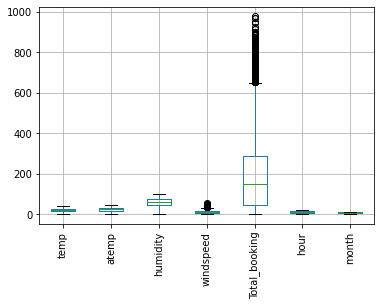

In [13]:
df_train.boxplot(rot=90)

In [14]:
outliers_list=[]
for i,column in enumerate(list(df_train.columns)):
  #print(column)
  if df_train[column].dtype in ('float64','int64'):
    #print(column)
    Q1=df_train[column].quantile(0.25)
    Q3=df_train[column].quantile(0.75)
    IQR=Q3-Q1
    outliers=df_train[(df_train[column] < (Q1-1.5*IQR))| (df_train[column] > (Q3 + 1.5 * IQR))]
    if len(outliers)>0:
      outliers_list.extend(outliers.index)
      print(f"No of Outliers for column {column} is {outliers.shape[0]} and Percentage is {(outliers.shape[0]*100)/df_train.shape[0]}")
      #print(outliers,outliers.index)

No of Outliers for column windspeed is 182 and Percentage is 2.090032154340836
No of Outliers for column Total_booking is 242 and Percentage is 2.779053743683969


* From the boxplot and code we can observe that windspeed and Total_booking columns has outliers

In [15]:
df_train['windspeed'].mean(),df_train['Total_booking'].mean()

(12.8438907671107, 193.00700505282498)

In [16]:
no_of_outliers=list(set(outliers_list))
len(no_of_outliers)

417

In [17]:
df_train.drop(no_of_outliers,axis=0,inplace=True) # Removing outliers indices
df_train.reset_index(drop=True,inplace=True)
df_train['windspeed'].mean(),df_train['Total_booking'].mean()

(12.33140939573031, 177.1194065854541)

* We removed all outliers indices by storing outliers indices in list and dropping them from dataframe
* Outliers are present in 417 rows out of 8708 rows
* There is change in mean after removing outliers columns

## Correlation Analysis

Correlation Analysis for Numerical Features

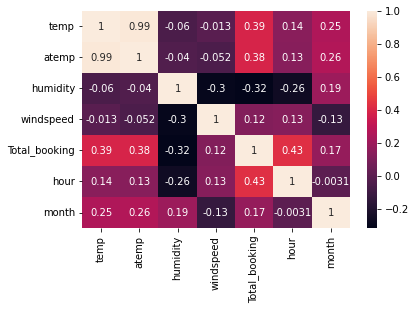

In [18]:
sns.heatmap(df_train.corr(),annot=True)
plt.show()

* We can observe that total_booking has some correlation with temp,atemp and has some negative correlation with humidity and very less correlated with windspeed.
* If the temp,atemp is high there are more bookings
* temp,atemp are highly correlated and 1 column is enough in those two

### Correlation Analysis For All Features

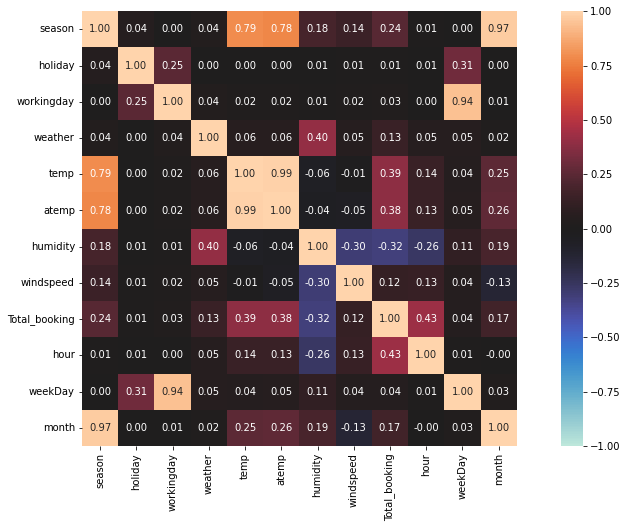

"fig, ax = plt.subplots(figsize=(25,25))\nsns.heatmap(df_train.corr(),annot=True,fmt='.2f')"

In [19]:
#pip install dython
fig, ax = plt.subplots(figsize=(16, 8))
nominal.associations(df_train,ax=ax)


'''fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(df_train.corr(),annot=True,fmt='.2f')'''

* Season is highly correlated with month ,temp,atemp 
* Workingday is highly correlated with weekday
* As they are categorical have a look after onehotencoding

## Data Visualization

### Probability Distribution Plot

<AxesSubplot: xlabel='Total_booking'>

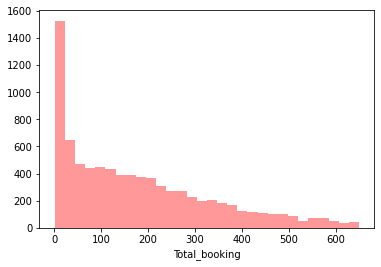

In [20]:
sns.distplot(df_train['Total_booking'], kde = False, color ='red', bins = 30)

In [21]:
len(df_train[df_train['Total_booking']<50])

2283

In [22]:
len(df_train[(df_train['Total_booking']>75) & (df_train['Total_booking']<200)])

2304

* We can observe that mostly Total_booking is below 50
* On an average there is around 130-190 bookings
* Very few times the Total_booking cross 400



### Visualize Total_booking vs (Month,Hour,Season,weekDay)

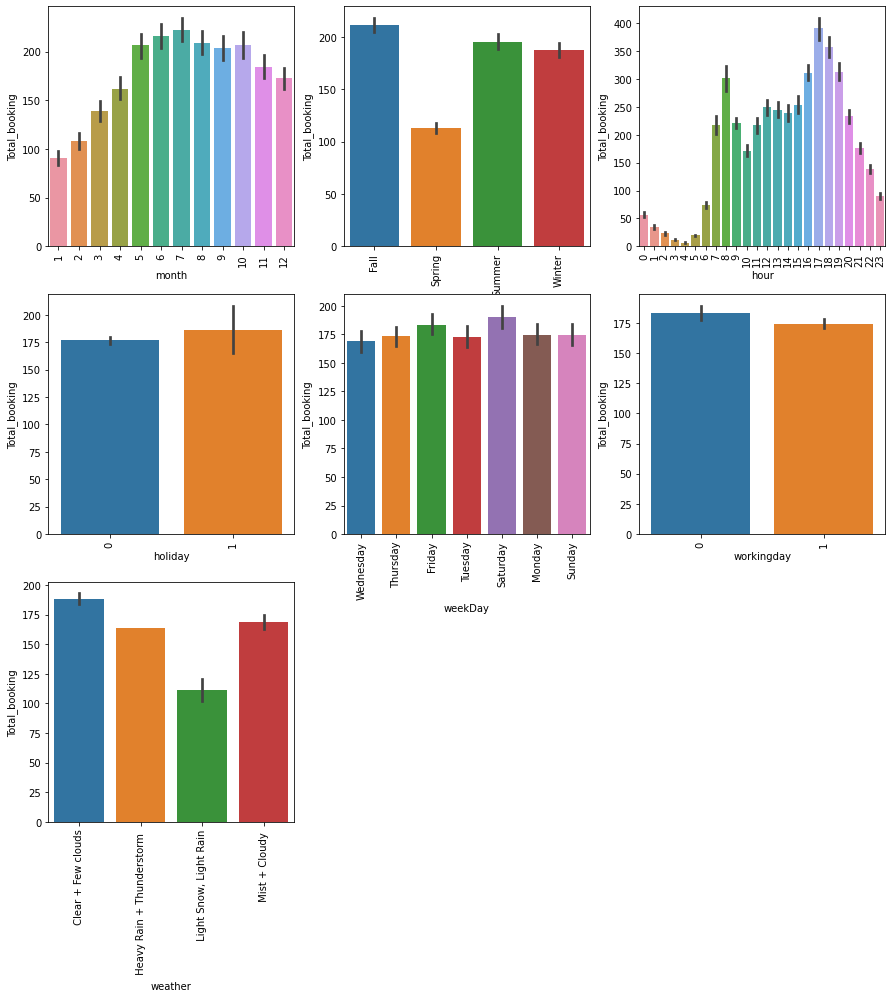

In [23]:
cols=['month','season','hour','holiday','weekDay','workingday','weather']
plt.figure(figsize=[15,15])
for col in cols:
  a=cols.index(col)+1
  plt.subplot(3,3,a)
  sns.barplot( x= col,y = 'Total_booking', data = df_train)
  plt.xticks(rotation='vertical')
plt.show()

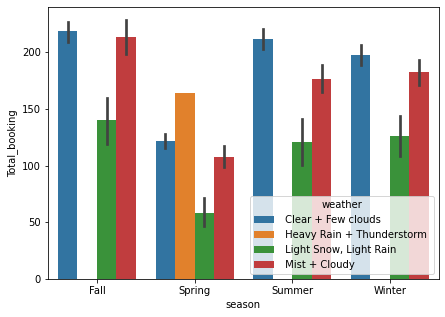

In [24]:
plt.figure(figsize=(7,5))
sns.barplot( x= 'season',y = 'Total_booking', data = df_train,hue='weather')
plt.show()

* May-November months has good bookings and January-April has lowest bookings
* Fall Season has highest no of bookings while Spring season has lowest no of bookings"
* We can observe that high bookings are between 7am -20:00 and peak at 8am in morning and 16:00-19:00 in evening 
* There are less bookings in between 23:00-6:00 
* We can observe that Saturday has highest no of bookings while Wednesday has lowest bookings
* Holiday or workingday has no impact on cab bookings


#### Univariate Analysis

* Histogram to plot all continuous Variables in data

array([[<AxesSubplot: title={'center': 'temp'}>,
        <AxesSubplot: title={'center': 'atemp'}>],
       [<AxesSubplot: title={'center': 'humidity'}>,
        <AxesSubplot: title={'center': 'windspeed'}>],
       [<AxesSubplot: title={'center': 'Total_booking'}>,
        <AxesSubplot: >]], dtype=object)

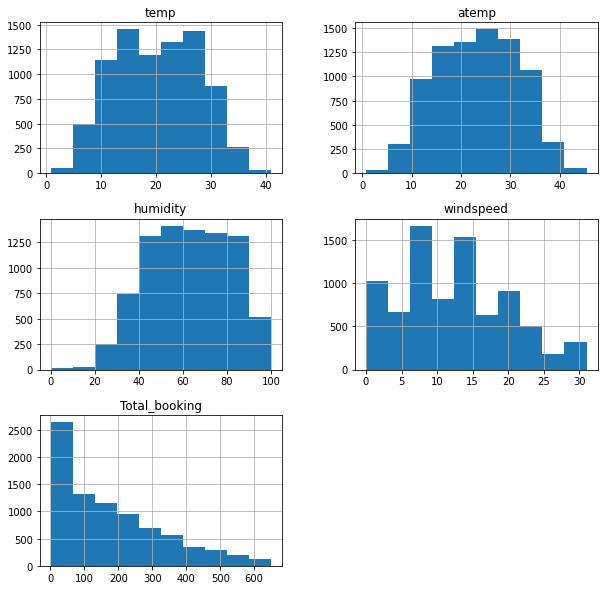

In [25]:
df_train[['temp','atemp','humidity','windspeed','Total_booking']].hist(figsize=(10,10))

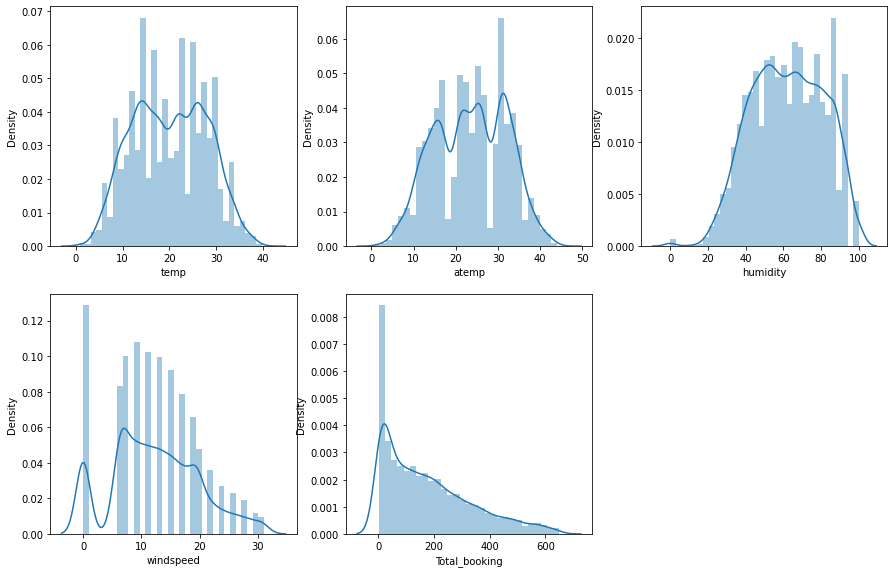

In [26]:
num_cols=['temp','atemp','humidity','windspeed','Total_booking']
plt.figure(figsize=[15,15])
for i,col in enumerate(num_cols):
  plt.subplot(3,3,i+1) 
  sns.distplot(df_train[col])
plt.show()

* Mostly temp is in between 15-25
* Atemp isin between 10-33 and most at around 25
* Mostly humidity is between 45-85
* Avg Total_booking is around 150-200 and mostly below 50
* Windspeed varies mostly between 0-20
* temp.atemp,humidity has no skewness in data,windspeed has positive skewness in data

#### MultiVariate Analysis

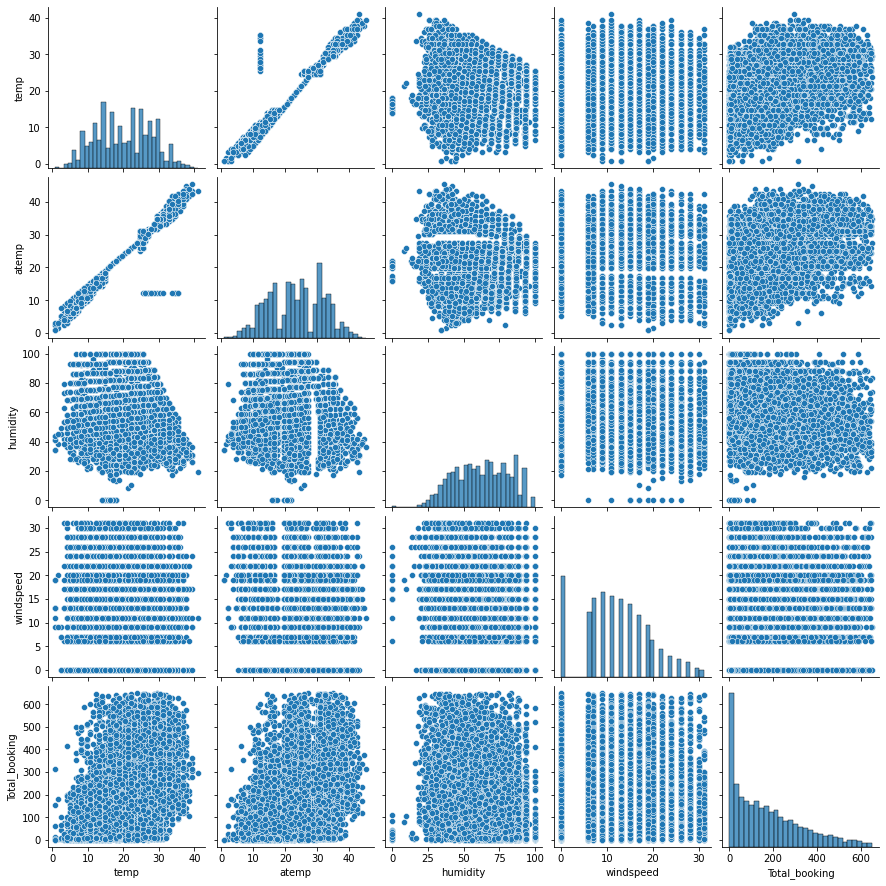

In [27]:
sns.pairplot(df_train[num_cols])

* Temp are Total_bookings has some linear relation
* Humidity and Total_bookings has some negative linear relation

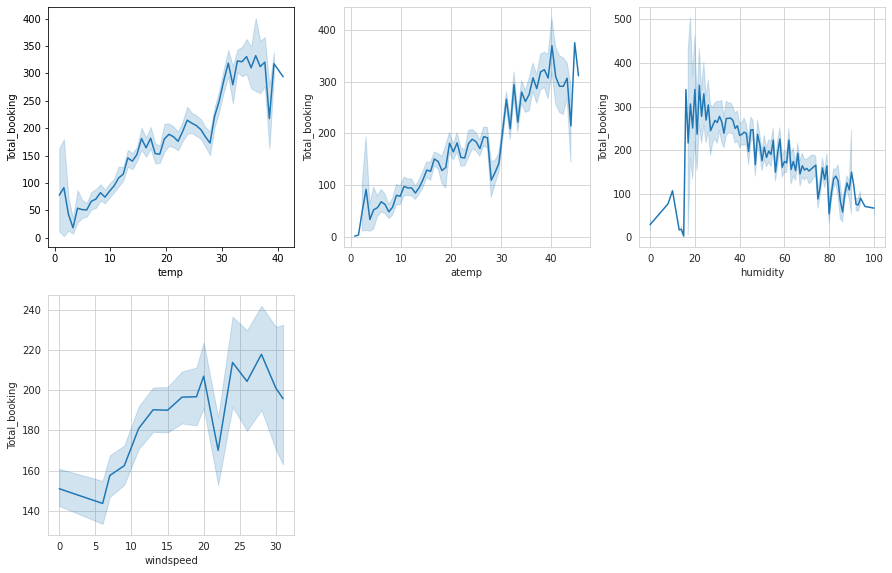

In [28]:
num_cols=['temp','atemp','humidity','windspeed','Total_booking']
plt.figure(figsize=[15,15])
for i,col in enumerate(num_cols[:4]):
  plt.subplot(3,3,i+1) 
  sns.set_style('whitegrid')
  sns.lineplot(data=df_train[num_cols],x=col,y='Total_booking')
plt.show()

* Total bookings are high if temp is above 25
* Bookings are high at 20-40 humidity.
* After 40 if humidity increases total bookings dec 

In [29]:
df_train.drop(['atemp'],axis=1,inplace=True)
df_test.drop(['atemp'],axis=1,inplace=True)

## Convert Categorical variables to OneHot vector

In [30]:
for column in ['season','holiday','workingday','weather','weekDay']:
  print(column,df_train[column].nunique())

season 4
holiday 2
workingday 2
weather 4
weekDay 7


In [31]:
for column in ['season','holiday','workingday','weather','weekDay']:
  print(column,df_test[column].nunique())

season 4
holiday 2
workingday 2
weather 3
weekDay 7


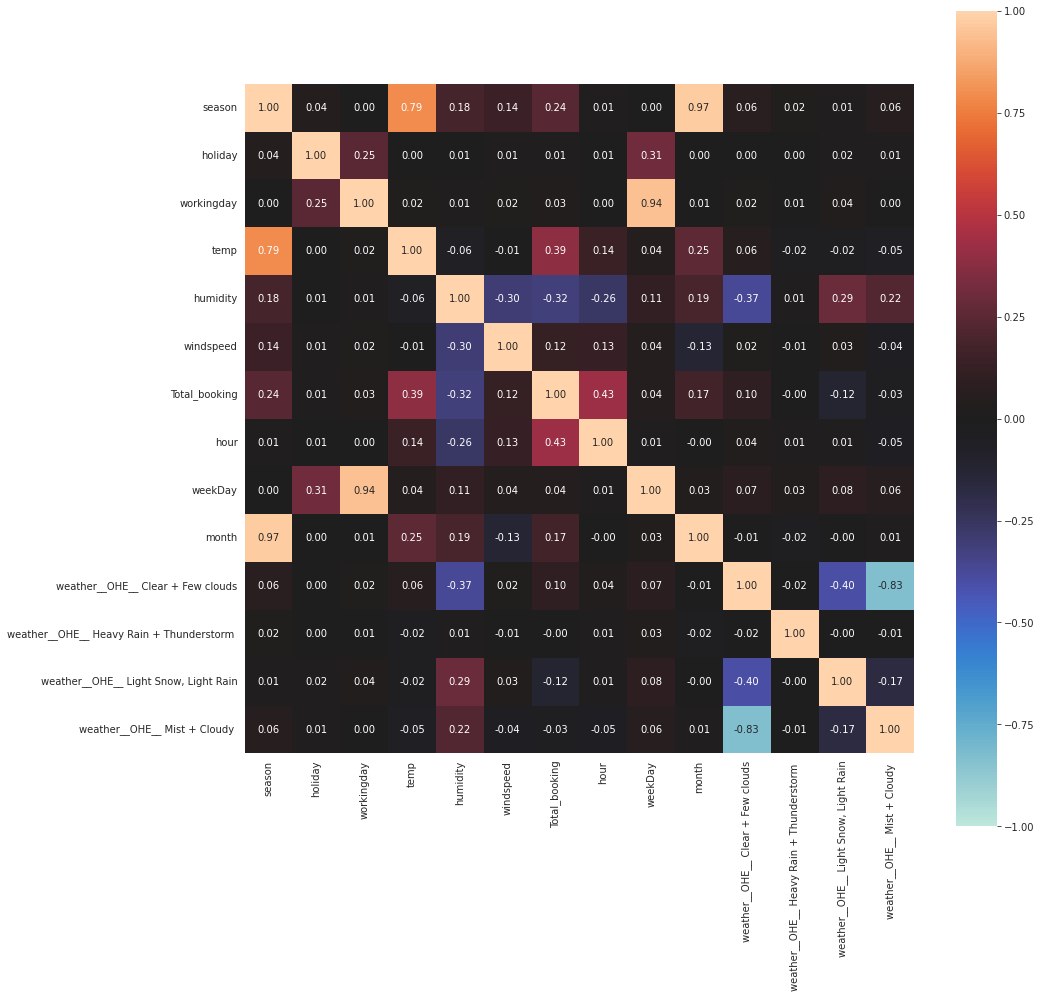

"fig, ax = plt.subplots(figsize=(25,25))\nsns.heatmap(df_train.corr(),annot=True,fmt='.2f')"

In [32]:
df_train=pd.get_dummies(df_train,columns=['weather'], prefix_sep="__OHE__")
df_test=pd.get_dummies(df_test,columns=['weather'], prefix_sep="__OHE__")
df_test.insert(11, 'weather_ Heavy Rain + Thunderstorm ',0, allow_duplicates=False)
fig, ax = plt.subplots(figsize=(15, 15))
nominal.associations(df_train,ax=ax)

'''fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(df_train.corr(),annot=True,fmt='.2f')'''

In [33]:
df_train_initial=df_train.copy()
df_test_initial=df_test.copy()

#### Dealing with Cyclic Features
http://blog.davidkaleko.com/feature-engineering-cyclical-features.html

In [34]:
df_train['weekDay'].value_counts(),df_train['season'].value_counts()

(Sunday       1226
 Saturday     1220
 Thursday     1187
 Monday       1180
 Friday       1174
 Tuesday      1159
 Wednesday    1145
 Name: weekDay, dtype: int64, Winter    2116
 Fall      2078
 Summer    2073
 Spring    2024
 Name: season, dtype: int64)

In [35]:
df_test['weekDay'].value_counts(),df_test['season'].value_counts()

(Wednesday    327
 Sunday       317
 Saturday     310
 Thursday     309
 Tuesday      309
 Monday       304
 Friday       302
 Name: weekDay, dtype: int64, Spring    550
 Winter    548
 Fall      544
 Summer    536
 Name: season, dtype: int64)

In [36]:
week_day={'Sunday':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6}
Season={'Winter':0,'Spring':1,'Summer':2,'Fall':3}
df_train['week_day']=df_train['weekDay'].map(week_day).astype(float)
df_train['Season']=df_train['season'].map(Season).astype(float)

df_test['week_day']=df_test['weekDay'].map(week_day).astype(float)
df_test['Season']=df_test['season'].map(Season).astype(float)

df_train['week_day_sin']=np.sin(df_train.week_day*(2.*np.pi/24))
df_train['week_day_cos']=np.cos(df_train.week_day*(2.*np.pi/24))
df_train['season_sin']=np.sin(df_train.Season*(2.*np.pi/24))
df_train['season_cos']=np.cos(df_train.Season*(2.*np.pi/24))
df_train['hour_sin'] = np.sin(df_train.hour*(2.*np.pi/24))
df_train['hour_cos'] = np.cos(df_train.hour*(2.*np.pi/24))
df_train['month_sin'] = np.sin((df_train.month-1)*(2.*np.pi/12))
df_train['month_cos'] = np.cos((df_train.month-1)*(2.*np.pi/12))

df_test['week_day_sin']=np.sin(df_test.week_day*(2.*np.pi/24))
df_test['week_day_cos']=np.cos(df_test.week_day*(2.*np.pi/24))
df_test['season_sin']=np.sin(df_test.Season*(2.*np.pi/24))
df_test['season_cos']=np.cos(df_test.Season*(2.*np.pi/24))
df_test['hour_sin'] = np.sin(df_test.hour*(2.*np.pi/24))
df_test['hour_cos'] = np.cos(df_test.hour*(2.*np.pi/24))
df_test['month_sin'] = np.sin((df_test.month-1)*(2.*np.pi/12))
df_test['month_cos'] = np.cos((df_test.month-1)*(2.*np.pi/12))


df_train.drop(['hour','month','season','weekDay','Season','week_day'],axis=1,inplace=True)
df_test.drop(['hour','month','season','weekDay','Season','week_day'],axis=1,inplace=True)

### Generating Cramer’s V pairwise matrix plot using `association_metrics` library

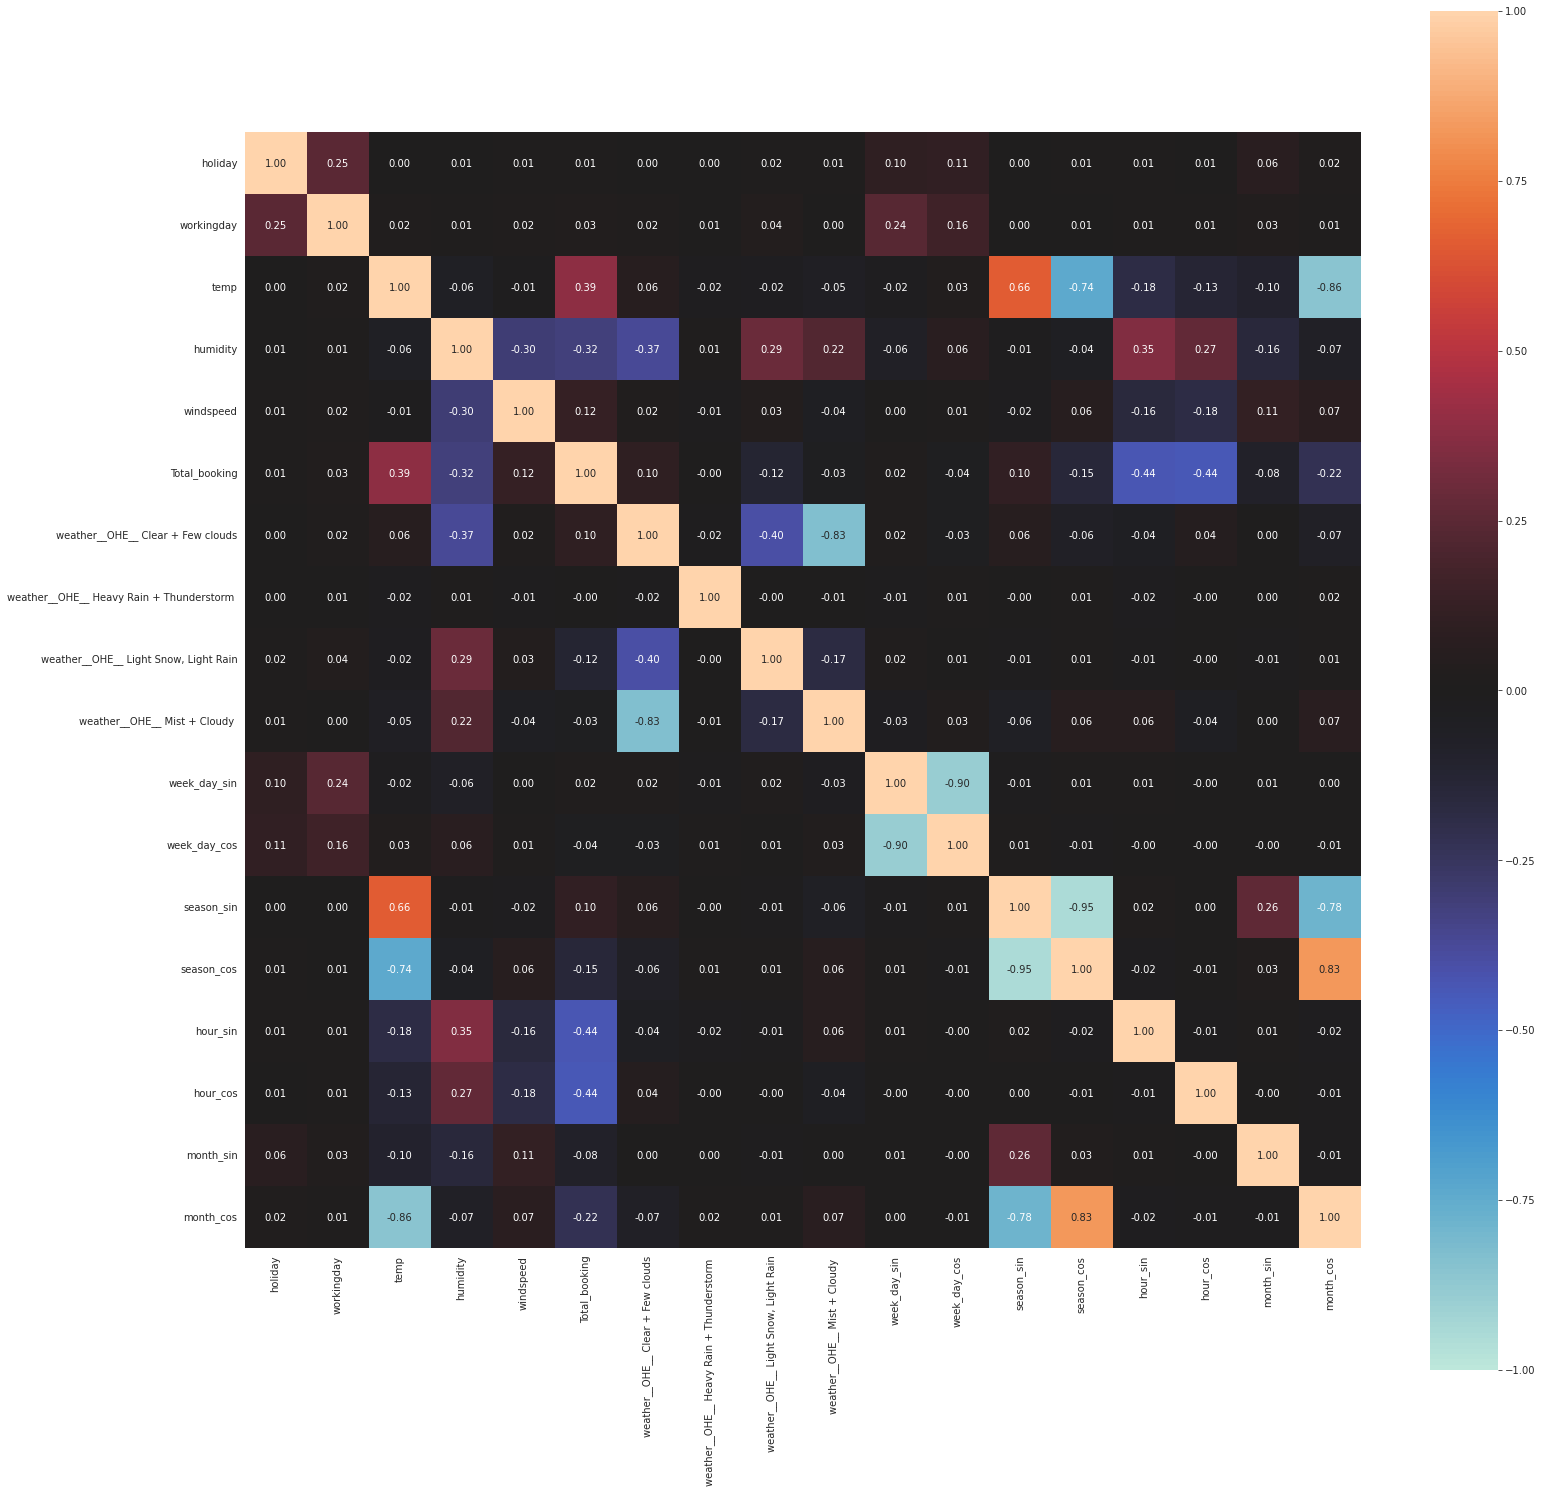

"fig, ax = plt.subplots(figsize=(25,25))\nsns.heatmap(df_train.corr(),annot=True,fmt='.2f')"

In [37]:
'''fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(df_train.corr(),annot=True,fmt='.2f')'''
fig, ax = plt.subplots(figsize=(25, 25))
nominal.associations(df_train,ax=ax)

'''fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(df_train.corr(),annot=True,fmt='.2f')'''

### Model Building

* Split 80% dataset into training dataset and 20% to testing dataset
* Standardize the data
* Fit Various Models
* Predict on test data in train_test_split and also on final test data
* Calculate Metrics like R2score,AdjustedR2score,RootMeanSquareError 

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xg
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error,r2_score,mean_squared_log_error,mean_absolute_error
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
import timeit


In [39]:
models=[]
models.append(('linear regression',LinearRegression()))
models.append(('decision tree',DecisionTreeRegressor(random_state=48)))
models.append(('SVR',SVR()))
models.append(('knn',KNeighborsRegressor()))
models.append(('naive bayes',BayesianRidge()))
models.append(('Random Forest',RandomForestRegressor(random_state=48)))
models.append(('Ada Boost',AdaBoostRegressor(random_state=48)))
models.append(('Ada Boost Base-RandomForest',AdaBoostRegressor(base_estimator=RandomForestRegressor(),random_state=48)))
models.append(('Bagging Regressor',BaggingRegressor(random_state=48)))
models.append(('GradientBoosting Regressor',GradientBoostingRegressor(random_state=48)))
models.append(('XGBoosting Regressor',xg.XGBRegressor(random_state=48)))
models.append(('MLPRegressor',MLPRegressor(random_state=48)))


In [40]:
def building_models(X,y,Xtest,ytest,columns,labels):
  X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=41)

  scaler = StandardScaler().fit(X_train)
  train_sc = scaler.transform(X_train)
  test_sc = scaler.transform(X_test)
  final_test_sc=scaler.transform(Xtest)

  Name=[]
  R2_score=[]
  MeanAbsoluteError=[]
  MeanSquaredError=[]
  RootMeanSquaredError=[]
  AdjustedR2_score=[]

  TestR2_score=[]
  TestAdjustedR2_score=[]
  TestMeanAbsoluteError=[]
  TestRootMeanSquaredError=[]

  num_features = 10 
  plt.figure(figsize=[25,60])
  i=1
  for name,model in models: 
    start_time = timeit.default_timer()
    model.fit(train_sc,Y_train)
    elapsed = timeit.default_timer() - start_time
    #print(f"Time taken to fit the {name} in sec is ",elapsed)
    
    y_pred=model.predict(test_sc)

    R2Score=round(r2_score(Y_test, y_pred),4)
    AdjustedR2Score=1-(1-R2Score)*(train_sc.shape[0]-1)/(train_sc.shape[0]-train_sc.shape[1]-1)
    MAE=round(mean_absolute_error(Y_test, y_pred),4)
    #MSE=round(mean_squared_error(Y_test, y_pred),4)
    #MSLE=mean_squared_log_error(Y_test, y_pred, squared=False)
    RMSE=round(mean_squared_error(Y_test, y_pred,squared=False),4)

    TestYPredict=model.predict(final_test_sc)
    
    TestR2score=round(r2_score(ytest,TestYPredict),4)
    TestAdjustedR2Score=1-(1-TestR2score)*(final_test_sc.shape[0]-1)/(final_test_sc.shape[0]-final_test_sc.shape[1]-1)
    TestMAE=mean_absolute_error(ytest,TestYPredict)
    TestRMSE=mean_squared_error(ytest,TestYPredict, squared=False)
    
    if name in ('decision tree','Random Forest','Ada Boost','Ada Boost Base-RandomForest','GradientBoosting Regressor','XGBoosting Regressor'):
      #print(name)
      plt.subplot(12,2,i) 
      feat_imp= pd.DataFrame()
      feat_imp = pd.DataFrame({"Col": columns})
      feat_imp["Coef"] = model.feature_importances_
      feat_imp["Col"] = feat_imp["Col"].apply(lambda x: x.split("__OHE__")[0])
      feat_imp = feat_imp.groupby("Col",as_index=False).sum().sort_values("Coef", ascending=False)
      #feat_imp = feat_imp.sort_values("Coef", ascending=False)
      #Scaling Weights
      feat_imp["FeatImp"] = (
              (feat_imp["Coef"] - feat_imp["Coef"].min())/ (feat_imp["Coef"].max() - feat_imp["Coef"].min())).round(4)
      #feat_imp['FeatImp'][:num_features][::-1].plot(ax=ax[i],kind='bar',figsize=(12,10),title= name) 
      plt.barh(range(num_features), feat_imp['FeatImp'][:num_features][::-1], color='b', align='center')
      plt.yticks(range(num_features), feat_imp['Col'][:num_features][::-1])
      plt.xlabel(f'Relative Importance of {name} in train dataset')
      i+=1
    
  
    Name.append(name)
    R2_score.append(R2Score)
    AdjustedR2_score.append(AdjustedR2Score)
    MeanAbsoluteError.append(MAE)
    #MeanSquaredError.append(MSE)
    RootMeanSquaredError.append(RMSE)

    TestR2_score.append(TestR2score)
    TestAdjustedR2_score.append(TestAdjustedR2Score)
    TestMeanAbsoluteError.append(TestMAE)
    TestRootMeanSquaredError.append(TestRMSE)
    
    Metrics=pd.DataFrame()
    Metrics=pd.DataFrame(data=[R2_score,AdjustedR2_score,MeanAbsoluteError,RootMeanSquaredError],columns=Name,index=labels)
    Metrics.insert(0, "Label", ['R2_score','AdjustedR2_score','MeanAbsoluteError','RootMeanSquaredError'], True)
    TestMetrics=pd.DataFrame()
    TestMetrics=pd.DataFrame(data=[TestR2_score,TestAdjustedR2_score,TestMeanAbsoluteError,TestRootMeanSquaredError],columns=Name,index=labels)
    TestMetrics.insert(0, "Label", ['R2_score','AdjustedR2_score','MeanAbsoluteError','RootMeanSquaredError'], True)

    '''
    print(f"AdjustedR2 score for {name}: {R2Score}")
    print(f"AdjustedR2 score for {name}: {AdjustedR2Score}")
    print(f"MeanAbsoluteError for {name} : {MAE}")
    print(f"MeanSquareError for {name} : {MSE}")
    print(f"RootMeanSquareError for {name}: {RMSE}")
    print()'''
    #print(f"MeanSquaredLogError for {model}: {mean_squared_log_error(Y_test, y_pred):.4f}")
    #ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.
  #fig.tight_layout(pad=5.0)
  '''plt.subplots_adjust(left=0.1,
                      bottom=1,
                      right=2,
                      top=2,
                      wspace=2,
                      hspace=2)'''
  plt.show()
  return Metrics,TestMetrics

### Scenario 1.1
* Calcualte Sin and Cos component of all cyclic features and Represent as co-ordinates of circle

[06:13:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


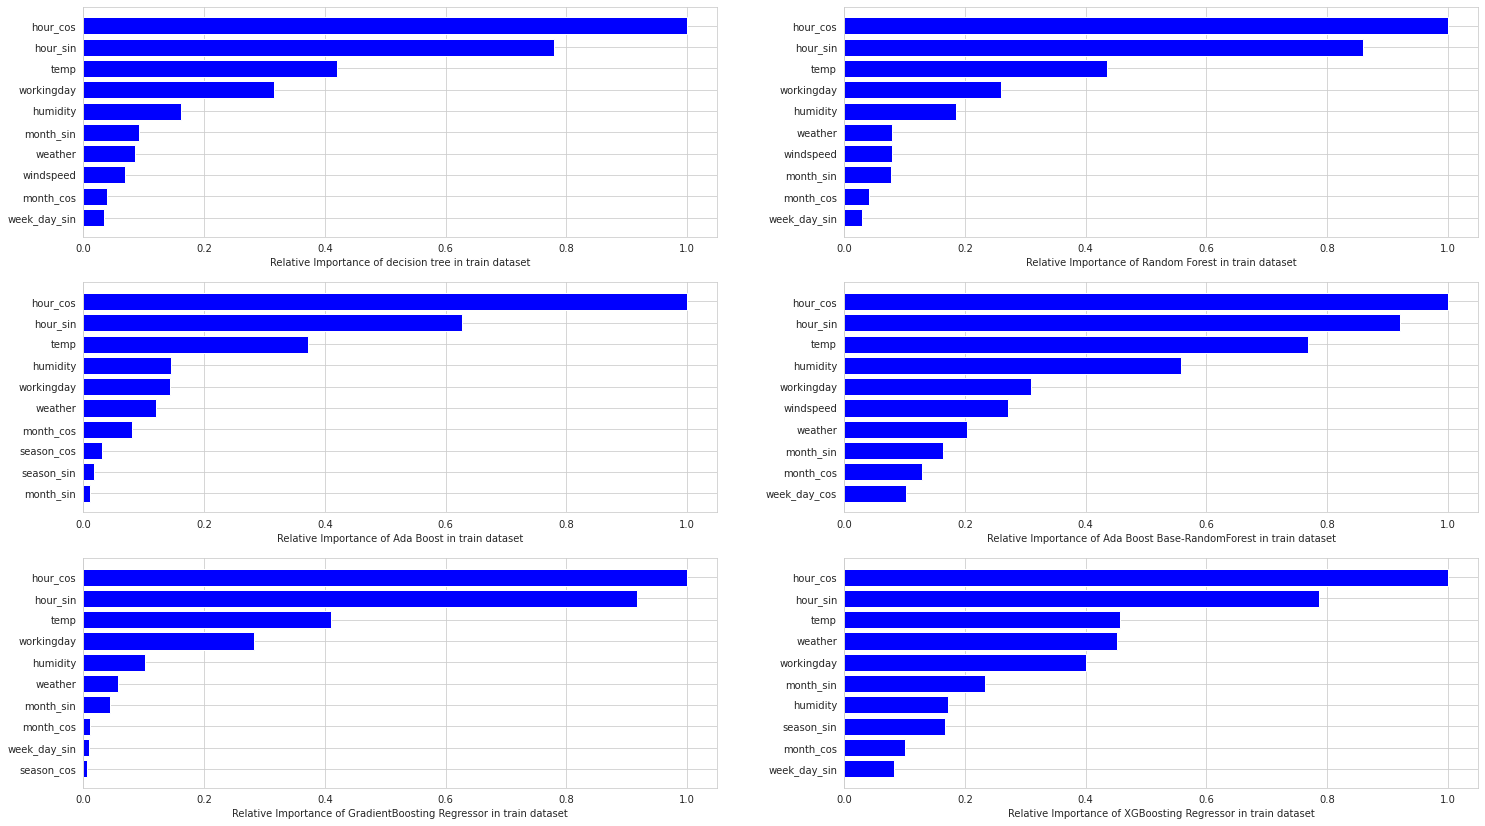

In [41]:
X=df_train.drop(['Total_booking'],axis=1).values
y=df_train['Total_booking'].values
Xtest=df_test.drop(['Total_booking'],axis=1).values
ytest=df_test['Total_booking'].values
columns=df_train.drop(['Total_booking'],axis=1).columns
labels=['Scenario 1.1','Scenario 1.1','Scenario 1.1','Scenario 1.1']
Metrics,TestMetrics=building_models(X,y,Xtest,ytest,columns,labels)

In [42]:
Metrics

,Label,linear regression,decision tree,SVR,knn,naive bayes,Random Forest,Ada Boost,Ada Boost Base-RandomForest,Bagging Regressor,GradientBoosting Regressor,XGBoosting Regressor,MLPRegressor
Scenario 1.1,R2_score,0.514100,0.715200,0.42800,0.754500,0.512900,0.857300,0.540300,0.862800,0.831600,0.805800,0.804600,0.738200
Scenario 1.1,AdjustedR2_score,0.512851,0.714468,0.42653,0.753869,0.511648,0.856933,0.539118,0.862447,0.831167,0.805301,0.804098,0.737527
Scenario 1.1,MeanAbsoluteError,80.955300,51.131100,80.73580,53.275300,81.104100,39.517500,81.586900,40.527100,42.286400,50.345600,51.202500,60.124200
Scenario 1.1,RootMeanSquaredError,108.246800,82.872400,117.44920,76.939200,108.384600,58.655700,105.291900,57.512600,63.731300,68.440800,68.648000,79.453100


In [43]:
TestMetrics

,Label,linear regression,decision tree,SVR,knn,naive bayes,Random Forest,Ada Boost,Ada Boost Base-RandomForest,Bagging Regressor,GradientBoosting Regressor,XGBoosting Regressor,MLPRegressor
Scenario 1.1,R2_score,0.427700,0.731400,0.333400,0.692400,0.428200,0.834100,0.531700,0.841300,0.821200,0.759000,0.761200,0.685400
Scenario 1.1,AdjustedR2_score,0.423196,0.729286,0.328154,0.689979,0.423700,0.832794,0.528014,0.840051,0.819793,0.757103,0.759321,0.682924
Scenario 1.1,MeanAbsoluteError,92.829121,57.065657,93.240188,63.035904,92.913949,45.737036,91.506107,46.082525,47.753139,58.828486,58.755265,68.057384
Scenario 1.1,RootMeanSquaredError,135.709025,92.971734,146.468224,99.488666,135.656628,73.062719,122.761317,71.468343,75.863669,88.063657,87.658799,100.617687


### Scenario 1.2 
* Dropping season_cos column as it is highly correlated with month_cos

[06:16:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


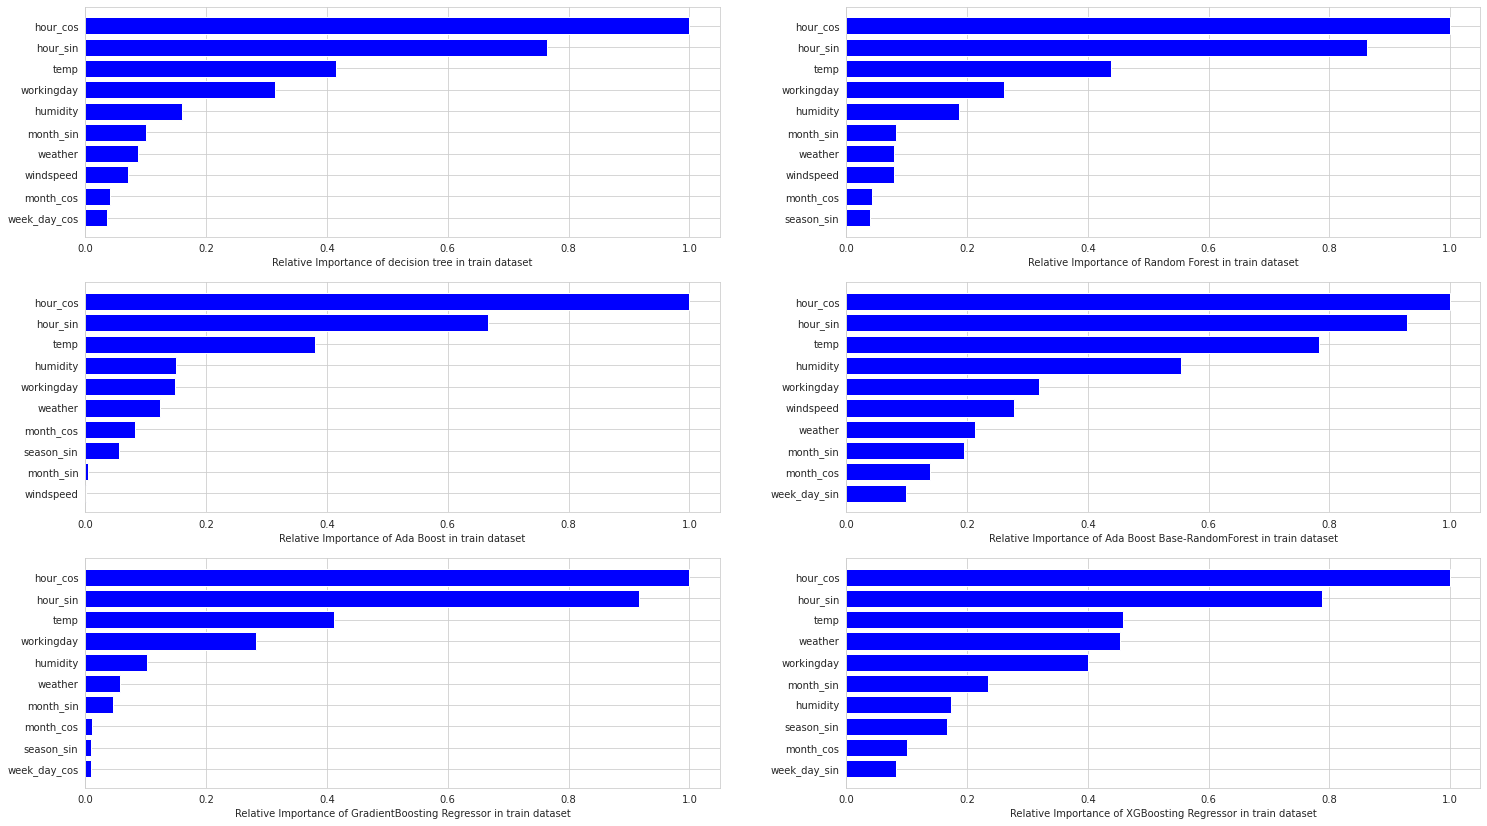

In [44]:
X1=df_train.drop(['Total_booking','season_cos'],axis=1).values
y1=df_train['Total_booking'].values
Xtest1=df_test.drop(['Total_booking','season_cos'],axis=1).values
ytest1=df_test['Total_booking'].values
columns1=df_train.drop(['Total_booking','season_cos'],axis=1).columns
labels1=['Scenario 1.2','Scenario 1.2','Scenario 1.2','Scenario 1.2']
Metrics1,TestMetrics1=building_models(X1,y1,Xtest1,ytest1,columns1,labels1)

In [45]:
Metrics1

,Label,linear regression,decision tree,SVR,knn,naive bayes,Random Forest,Ada Boost,Ada Boost Base-RandomForest,Bagging Regressor,GradientBoosting Regressor,XGBoosting Regressor,MLPRegressor
Scenario 1.2,R2_score,0.512400,0.726500,0.435800,0.75610,0.511600,0.857800,0.540300,0.862500,0.832600,0.80580,0.804600,0.733200
Scenario 1.2,AdjustedR2_score,0.511221,0.725838,0.434435,0.75551,0.510419,0.857456,0.539188,0.862167,0.832195,0.80533,0.804127,0.732555
Scenario 1.2,MeanAbsoluteError,80.827300,50.128400,79.787300,52.93160,81.082400,39.483200,81.586900,40.608100,41.955900,50.34190,51.202500,60.845200
Scenario 1.2,RootMeanSquaredError,108.444600,81.222400,116.649900,76.69830,108.531300,58.558800,105.291900,57.586500,63.538300,68.43870,68.648000,80.221800


In [46]:
TestMetrics1

,Label,linear regression,decision tree,SVR,knn,naive bayes,Random Forest,Ada Boost,Ada Boost Base-RandomForest,Bagging Regressor,GradientBoosting Regressor,XGBoosting Regressor,MLPRegressor
Scenario 1.2,R2_score,0.427500,0.727200,0.340500,0.696000,0.428400,0.833400,0.531700,0.840400,0.819600,0.759000,0.761200,0.681600
Scenario 1.2,AdjustedR2_score,0.423261,0.725180,0.335617,0.693749,0.424168,0.832166,0.528233,0.839218,0.818264,0.757216,0.759432,0.679243
Scenario 1.2,MeanAbsoluteError,92.573978,57.403811,92.324067,62.649679,92.778177,45.779964,91.506107,46.195348,48.027290,58.822387,58.755265,68.417647
Scenario 1.2,RootMeanSquaredError,135.728895,93.696681,145.686598,98.907927,135.630797,73.229122,122.761317,71.663978,76.202239,88.060311,87.658799,101.231259


* There is slight improvement in SVR and almost same results in train and test data with and without droping season_cos.

* season_cos didn't impact much as there is correlated variable

### Scenario 1.3 
* Dropping month_cos column as it is highly correlated with season_cos

[06:18:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


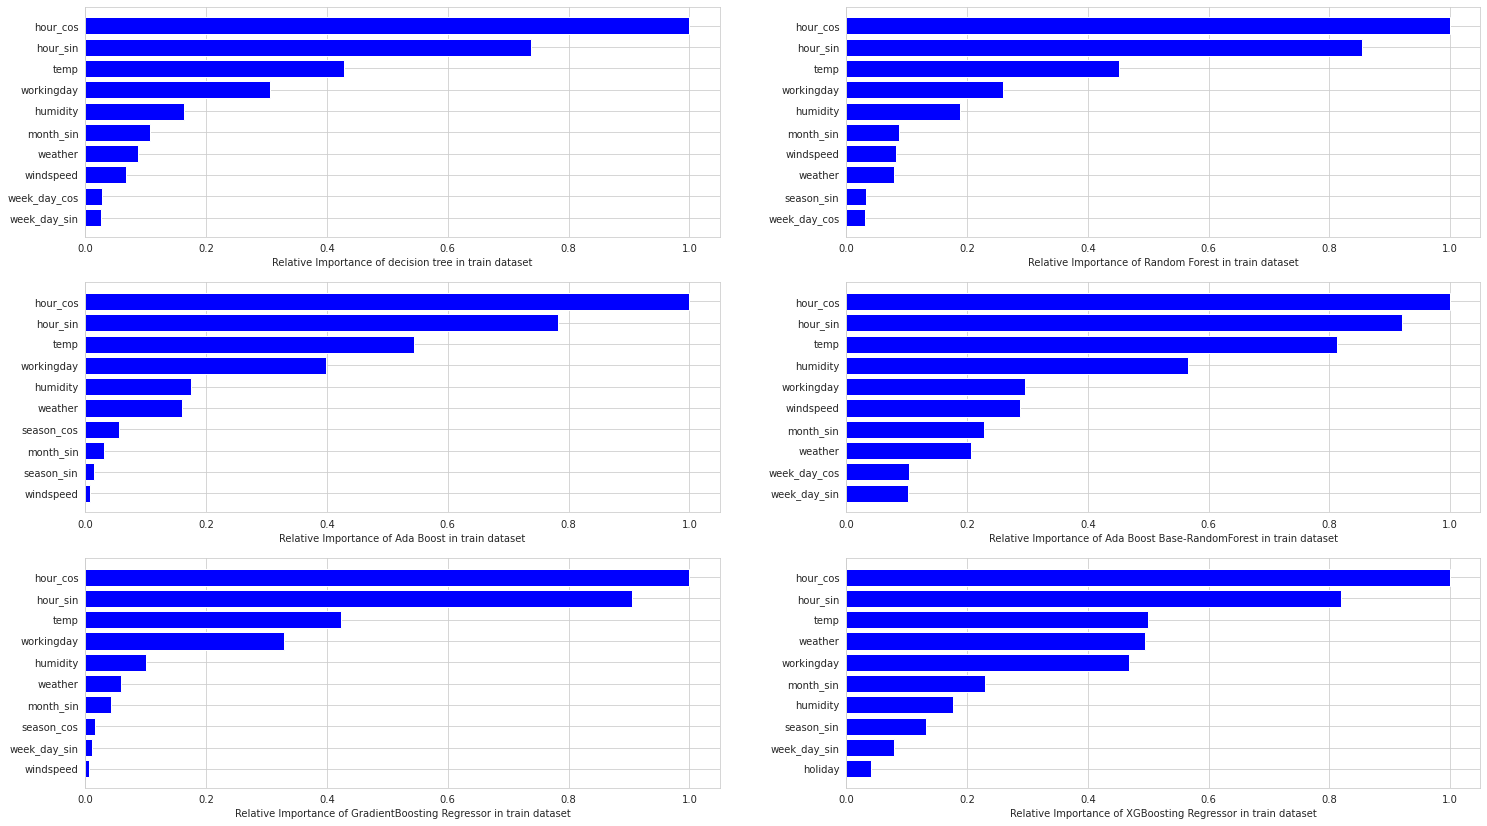

In [47]:
X11=df_train.drop(['Total_booking','month_cos'],axis=1).values
y11=df_train['Total_booking'].values
Xtest11=df_test.drop(['Total_booking','month_cos'],axis=1).values
ytest11=df_test['Total_booking'].values
columns11=df_train.drop(['Total_booking','month_cos'],axis=1).columns
labels11=['Scenario 1.3','Scenario 1.3','Scenario 1.3','Scenario 1.3']
Metrics11,TestMetrics11=building_models(X11,y11,Xtest11,ytest11,columns11,labels11)

In [48]:
Metrics11

,Label,linear regression,decision tree,SVR,knn,naive bayes,Random Forest,Ada Boost,Ada Boost Base-RandomForest,Bagging Regressor,GradientBoosting Regressor,XGBoosting Regressor,MLPRegressor
Scenario 1.3,R2_score,0.506700,0.71890,0.424900,0.757400,0.505900,0.856000,0.561400,0.858700,0.840400,0.809200,0.802900,0.736200
Scenario 1.3,AdjustedR2_score,0.505507,0.71822,0.423509,0.756813,0.504705,0.855652,0.560339,0.858358,0.840014,0.808739,0.802423,0.735562
Scenario 1.3,MeanAbsoluteError,81.229800,52.08380,81.023900,52.908300,81.371000,39.701800,81.004100,41.112500,41.158300,49.966000,50.943800,60.397300
Scenario 1.3,RootMeanSquaredError,109.073700,82.33050,117.765200,76.497200,109.162400,58.938400,102.850100,58.385300,62.031600,67.834300,68.946700,79.762700


In [49]:
TestMetrics11

,Label,linear regression,decision tree,SVR,knn,naive bayes,Random Forest,Ada Boost,Ada Boost Base-RandomForest,Bagging Regressor,GradientBoosting Regressor,XGBoosting Regressor,MLPRegressor
Scenario 1.3,R2_score,0.425200,0.731500,0.331100,0.696800,0.425900,0.832600,0.559100,0.841000,0.823100,0.765600,0.760000,0.686800
Scenario 1.3,AdjustedR2_score,0.420944,0.729512,0.326147,0.694555,0.421649,0.831361,0.555836,0.839823,0.821790,0.763865,0.758223,0.684481
Scenario 1.3,MeanAbsoluteError,92.907078,57.277778,93.379224,62.538017,92.926827,45.910745,90.490391,46.241142,47.514109,57.795772,58.840548,67.812289
Scenario 1.3,RootMeanSquaredError,136.008869,92.956310,146.720692,98.772114,135.918663,73.394194,119.110414,71.528032,75.450413,86.852094,87.878540,100.391217


Dropping season_cos is best than dropping month_cos

### Scenario 1.4 
* Checking dropping temp along with season_cos

[06:20:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


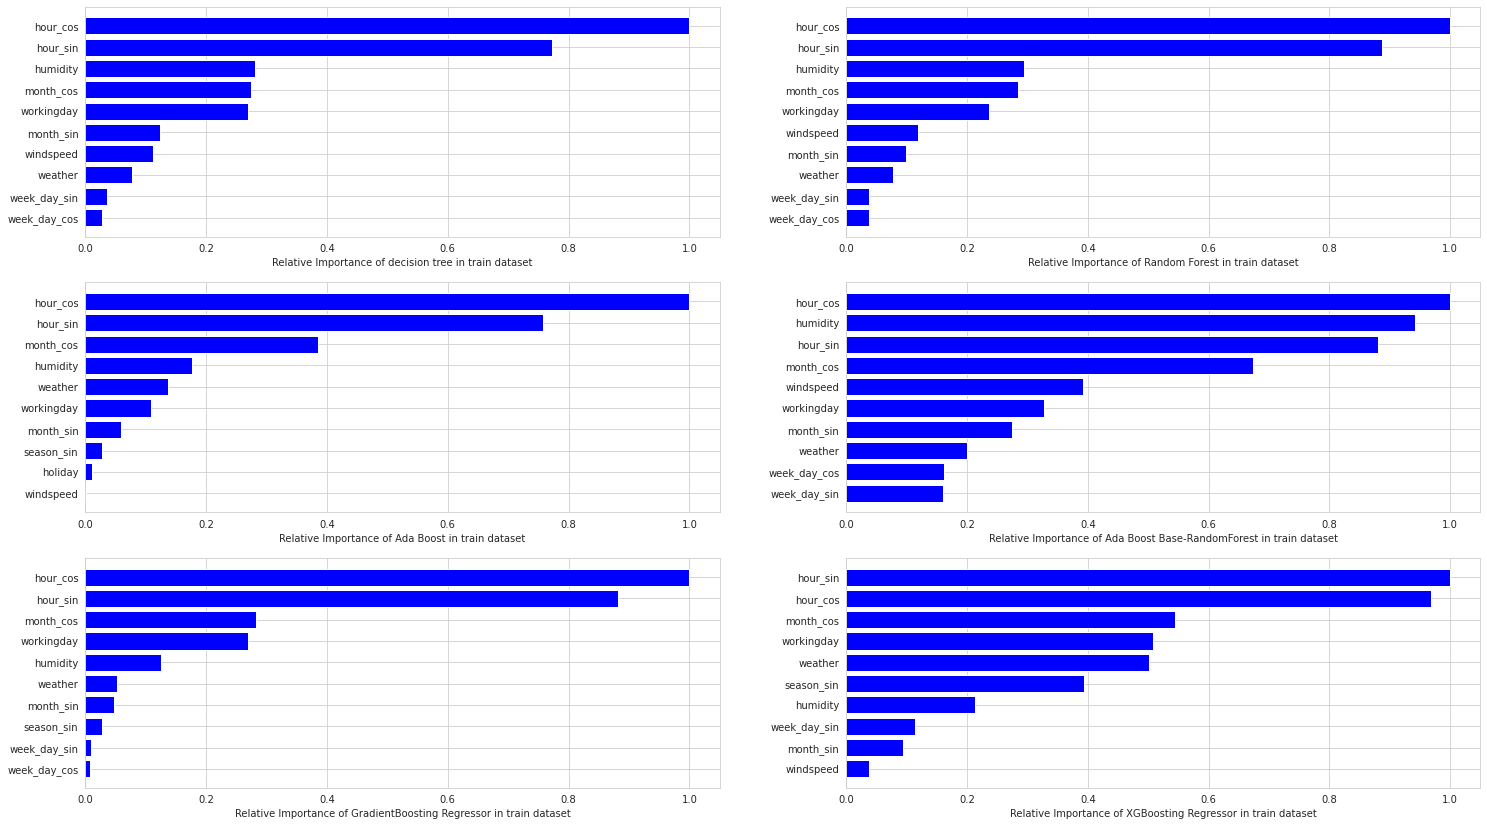

In [50]:
X10=df_train.drop(['Total_booking','season_cos','temp'],axis=1).values
y10=df_train['Total_booking'].values
Xtest10=df_test.drop(['Total_booking','season_cos','temp'],axis=1).values
ytest10=df_test['Total_booking'].values
columns10=df_train.drop(['Total_booking','season_cos','temp'],axis=1).columns
labels10=['Scenario 1.4','Scenario 1.4','Scenario 1.4','Scenario 1.4']
Metrics10,TestMetrics10=building_models(X10,y10,Xtest10,ytest10,columns10,labels10)

In [51]:
Metrics10

,Label,linear regression,decision tree,SVR,knn,naive bayes,Random Forest,Ada Boost,Ada Boost Base-RandomForest,Bagging Regressor,GradientBoosting Regressor,XGBoosting Regressor,MLPRegressor
Scenario 1.4,R2_score,0.505200,0.68260,0.412300,0.741300,0.505200,0.834500,0.558400,0.835300,0.810100,0.786500,0.794600,0.702100
Scenario 1.4,AdjustedR2_score,0.504078,0.68188,0.410968,0.740713,0.504078,0.834125,0.557399,0.834927,0.809669,0.786016,0.794134,0.701425
Scenario 1.4,MeanAbsoluteError,81.772500,55.61930,81.879000,55.331000,81.766400,43.062700,78.508600,47.099600,44.998600,53.494100,52.357000,64.588300
Scenario 1.4,RootMeanSquaredError,109.238700,87.49540,119.054500,78.982900,109.239900,63.186700,103.203000,63.022500,67.682700,71.749000,70.384700,84.766500


In [52]:
TestMetrics10

,Label,linear regression,decision tree,SVR,knn,naive bayes,Random Forest,Ada Boost,Ada Boost Base-RandomForest,Bagging Regressor,GradientBoosting Regressor,XGBoosting Regressor,MLPRegressor
Scenario 1.4,R2_score,0.418000,0.686800,0.317000,0.682700,0.418000,0.812400,0.534700,0.810800,0.805700,0.734500,0.742900,0.644100
Scenario 1.4,AdjustedR2_score,0.413962,0.684627,0.312261,0.680499,0.413962,0.811098,0.531472,0.809487,0.804352,0.732658,0.741116,0.641631
Scenario 1.4,MeanAbsoluteError,94.011788,62.797750,94.302696,63.706795,94.000383,49.618578,90.485194,52.683364,50.521683,62.717835,61.159272,73.843395
Scenario 1.4,RootMeanSquaredError,136.858455,100.393565,148.255547,101.045860,136.860210,77.698775,122.361840,78.037257,79.069660,92.438259,90.953596,107.016785


* Dropping temp didn't work

### Scenario 2
* Calcualte Sin and Cos component of only hour and month cyclic features and Represent as co-ordinates of circle
* Encoding for season and weekDay


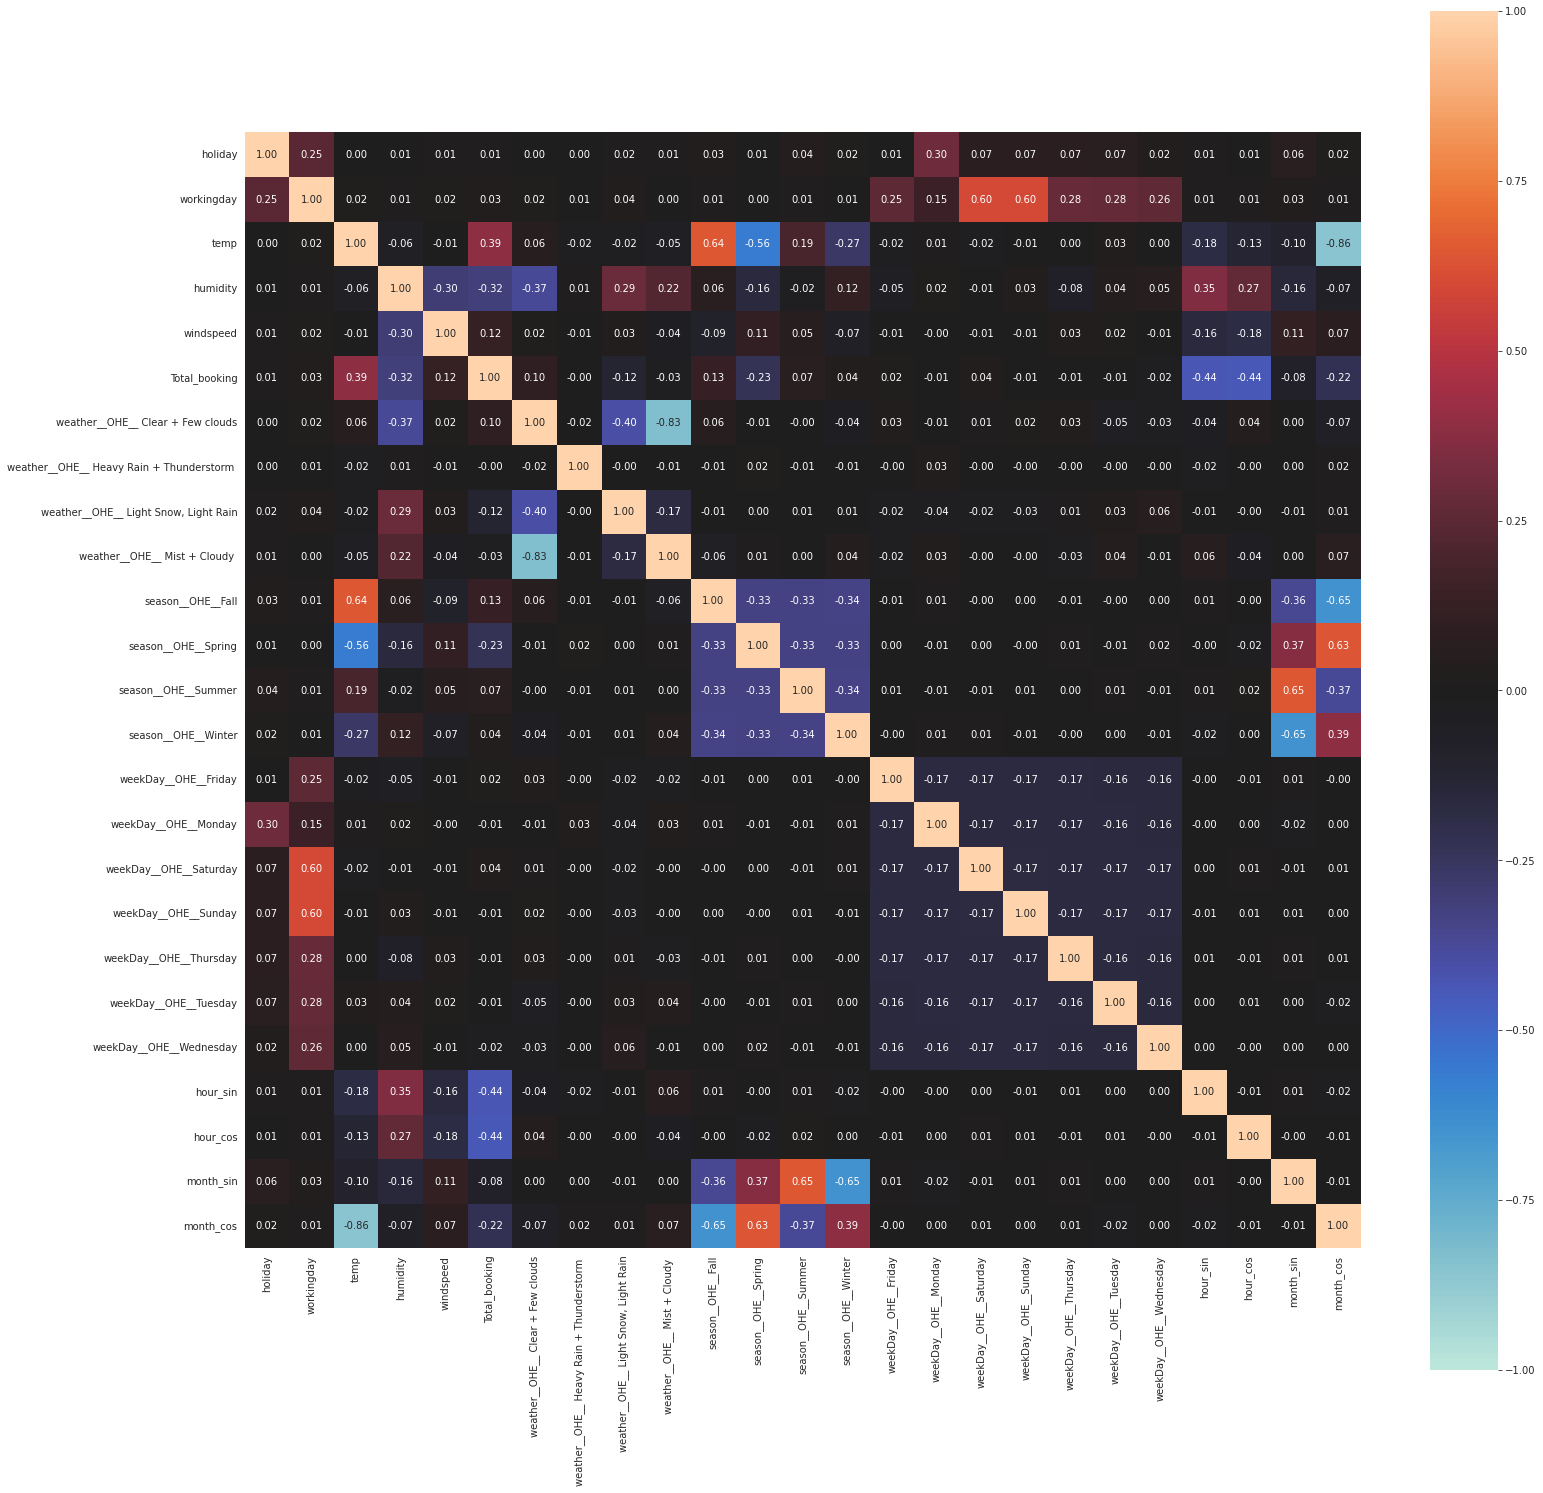

"fig, ax = plt.subplots(figsize=(25,25))\nsns.heatmap(df_train.corr(),annot=True,fmt='.2f')"

In [53]:
df_train1=df_train_initial.copy()
df_train1=pd.get_dummies(df_train1,columns=['season','weekDay'], prefix_sep="__OHE__")
df_train1['hour_sin'] = np.sin(df_train1.hour*(2.*np.pi/24))
df_train1['hour_cos'] = np.cos(df_train1.hour*(2.*np.pi/24))
df_train1['month_sin'] = np.sin((df_train1.month-1)*(2.*np.pi/12))
df_train1['month_cos'] = np.cos((df_train1.month-1)*(2.*np.pi/12))
df_train1.drop(['hour','month'],axis=1,inplace=True)

df_test1=df_test_initial.copy()
df_test1=pd.get_dummies(df_test1,columns=['season','weekDay'], prefix_sep="__OHE__")
df_test1['hour_sin'] = np.sin(df_test1.hour*(2.*np.pi/24))
df_test1['hour_cos'] = np.cos(df_test1.hour*(2.*np.pi/24))
df_test1['month_sin'] = np.sin((df_test1.month-1)*(2.*np.pi/12))
df_test1['month_cos'] = np.cos((df_test1.month-1)*(2.*np.pi/12))
df_test1.drop(['hour','month'],axis=1,inplace=True)


fig, ax = plt.subplots(figsize=(25, 25))
nominal.associations(df_train1,ax=ax)

'''fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(df_train.corr(),annot=True,fmt='.2f')'''

[06:23:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


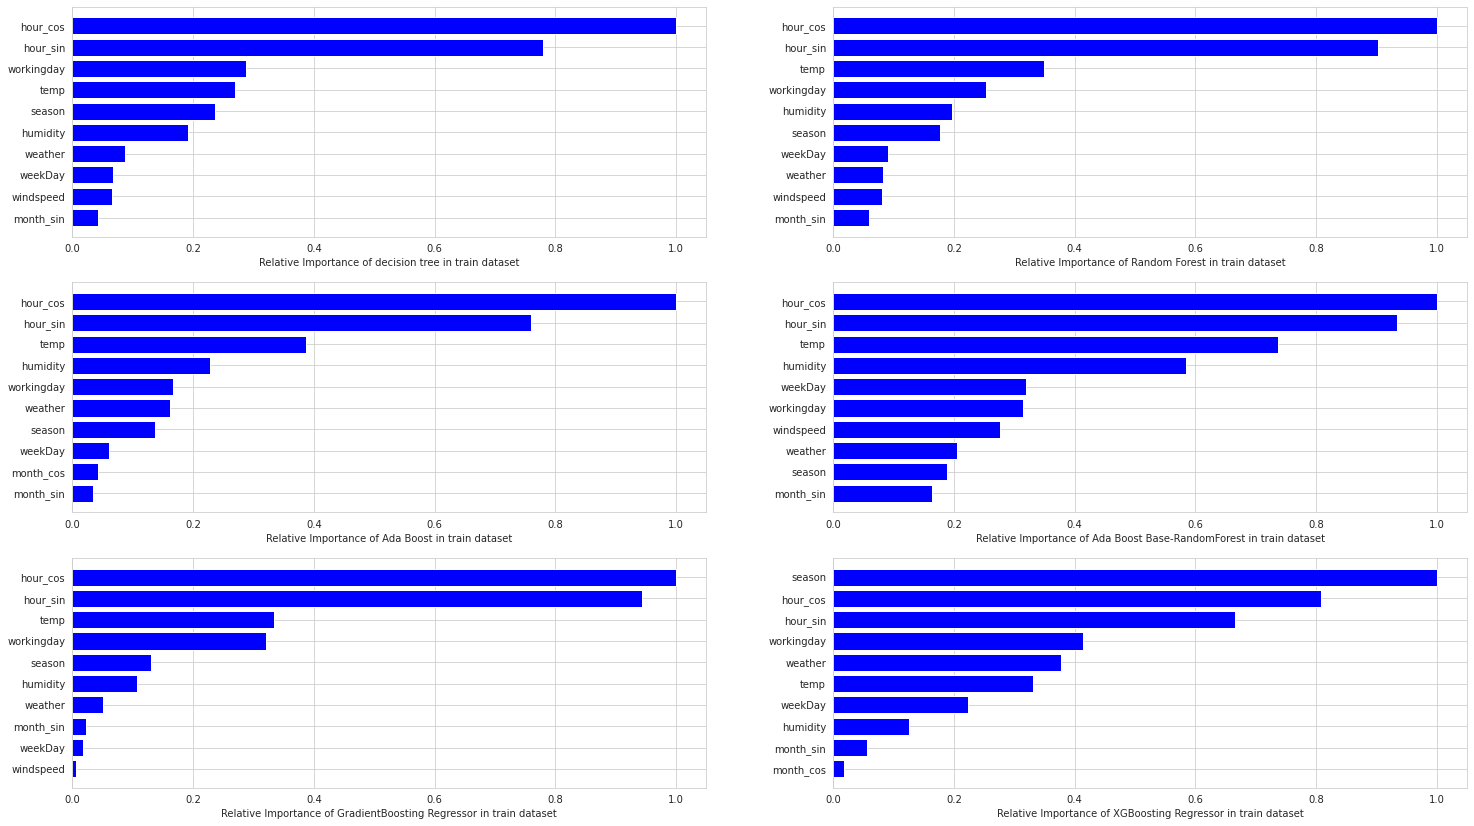

In [54]:
X2=df_train1.drop(['Total_booking'],axis=1).values
y2=df_train1['Total_booking'].values
Xtest2=df_test1.drop(['Total_booking'],axis=1).values
ytest2=df_test1['Total_booking'].values
columns2=df_train1.drop(['Total_booking'],axis=1).columns
labels2=['Scenario 2','Scenario 2','Scenario 2','Scenario 2']
Metrics2,TestMetrics2=building_models(X2,y2,Xtest2,ytest2,columns2,labels2)

In [55]:
Metrics2

,Label,linear regression,decision tree,SVR,knn,naive bayes,Random Forest,Ada Boost,Ada Boost Base-RandomForest,Bagging Regressor,GradientBoosting Regressor,XGBoosting Regressor,MLPRegressor
Scenario 2,R2_score,0.517500,0.717300,0.399300,0.707700,0.517300,0.855100,0.534100,0.861900,0.833100,0.815300,0.811500,0.745100
Scenario 2,AdjustedR2_score,0.515747,0.716273,0.397118,0.706638,0.515547,0.854574,0.532408,0.861398,0.832494,0.814629,0.810815,0.744174
Scenario 2,MeanAbsoluteError,81.183200,52.765800,85.290900,58.795300,81.302600,39.791000,82.823600,40.954900,42.294300,48.904800,49.075800,59.565400
Scenario 2,RootMeanSquaredError,107.869500,82.567400,120.365100,83.964600,107.889800,59.117600,106.004200,57.705500,63.448800,66.743500,67.421900,78.410300


In [56]:
TestMetrics2

,Label,linear regression,decision tree,SVR,knn,naive bayes,Random Forest,Ada Boost,Ada Boost Base-RandomForest,Bagging Regressor,GradientBoosting Regressor,XGBoosting Regressor,MLPRegressor
Scenario 2,R2_score,0.433700,0.748100,0.302000,0.632400,0.433200,0.836500,0.536800,0.842400,0.825900,0.770400,0.765100,0.690700
Scenario 2,AdjustedR2_score,0.427387,0.745292,0.294219,0.628302,0.426882,0.834677,0.531637,0.840643,0.823959,0.767841,0.762482,0.687252
Scenario 2,MeanAbsoluteError,92.700663,56.184573,97.614690,69.133333,92.843538,45.676418,91.580898,46.493943,47.120691,57.108651,57.813604,67.082580
Scenario 2,RootMeanSquaredError,134.996256,90.031159,149.870933,108.767956,135.054030,72.537327,122.091129,71.211861,74.861200,85.951317,86.946964,99.767507


### Scenario 3
* Without Converting hour and month into cosine and sin functions and also without encoding hour and month.
* Keep hour in 0-23 and month in 0-11
* Encoding of season,weekday


[06:25:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


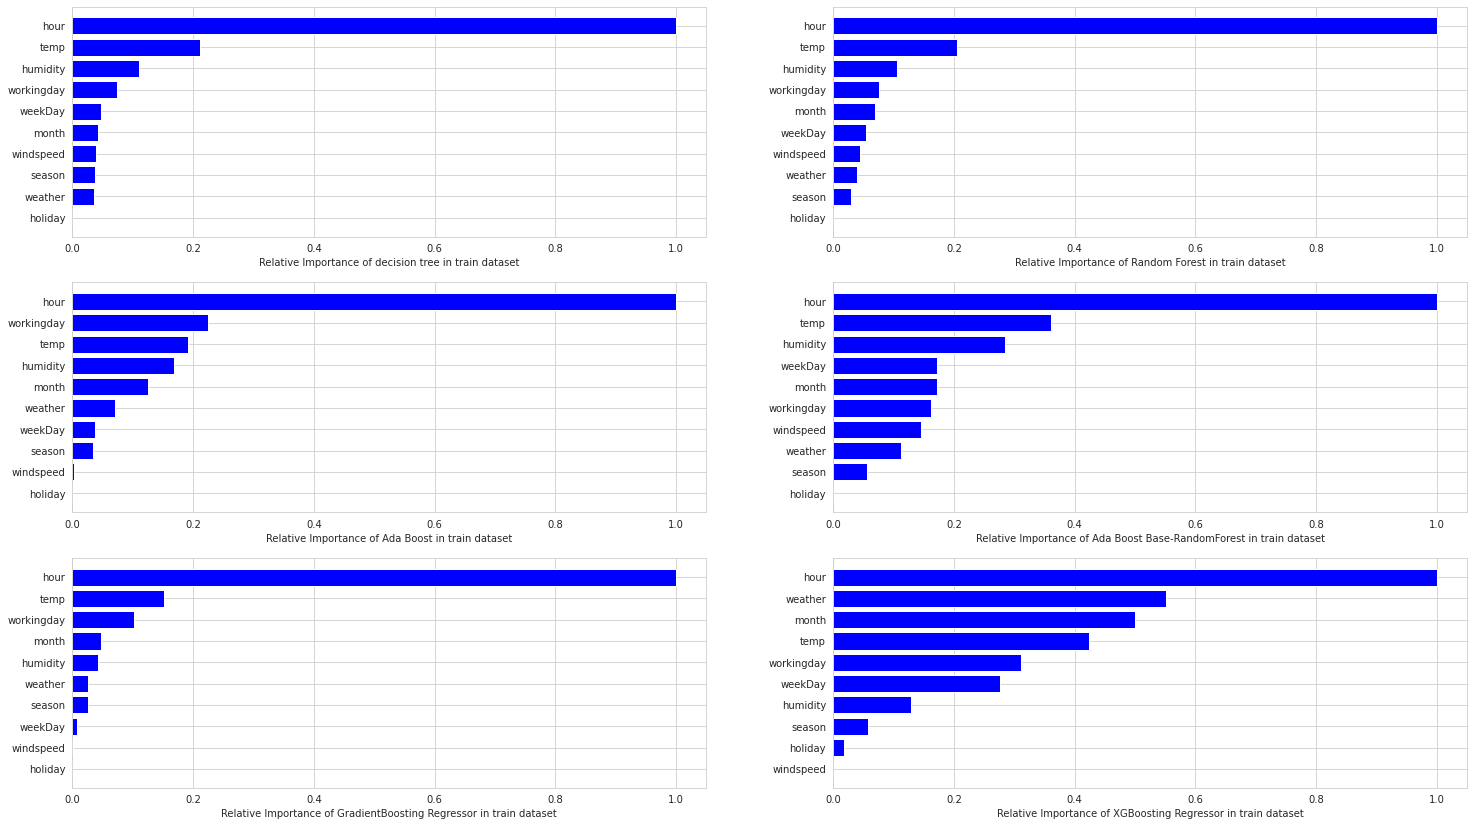

In [57]:
df_train2=df_train_initial.copy()
df_train2=pd.get_dummies(df_train2,columns=['season','weekDay'], prefix_sep="__OHE__")
X3=df_train2.drop(['Total_booking'],axis=1).values
y3=df_train2['Total_booking'].values
df_test2=df_test_initial.copy()
df_test2=pd.get_dummies(df_test2,columns=['season','weekDay'], prefix_sep="__OHE__")
Xtest3=df_test2.drop(['Total_booking'],axis=1).values
ytest3=df_test2['Total_booking'].values
columns3=df_train2.drop(['Total_booking'],axis=1).columns
labels3=['Scenario 3','Scenario 3','Scenario 3','Scenario 3']
Metrics_no_cyclic,TestMetrics_no_cyclic=building_models(X3,y3,Xtest3,ytest3,columns3,labels3)

In [58]:
Metrics_no_cyclic

,Label,linear regression,decision tree,SVR,knn,naive bayes,Random Forest,Ada Boost,Ada Boost Base-RandomForest,Bagging Regressor,GradientBoosting Regressor,XGBoosting Regressor,MLPRegressor
Scenario 3,R2_score,0.402000,0.70270,0.297300,0.568400,0.401600,0.855000,0.545900,0.863200,0.837400,0.804300,0.804500,0.603900
Scenario 3,AdjustedR2_score,0.400009,0.70171,0.294961,0.566963,0.399608,0.854517,0.544388,0.862745,0.836859,0.803649,0.803849,0.602581
Scenario 3,MeanAbsoluteError,93.469000,52.63860,94.848100,74.342000,93.432800,39.726800,81.617300,40.607500,41.822500,48.978600,48.915800,75.797900
Scenario 3,RootMeanSquaredError,120.090600,84.68070,130.183600,102.018300,120.134900,59.139100,104.646400,57.449000,62.620700,68.692700,68.663200,97.743600


In [59]:
TestMetrics_no_cyclic

,Label,linear regression,decision tree,SVR,knn,naive bayes,Random Forest,Ada Boost,Ada Boost Base-RandomForest,Bagging Regressor,GradientBoosting Regressor,XGBoosting Regressor,MLPRegressor
Scenario 3,R2_score,0.343700,0.740300,0.218200,0.497200,0.342300,0.836100,0.530700,0.844000,0.819700,0.755700,0.753700,0.531400
Scenario 3,AdjustedR2_score,0.337000,0.737649,0.210219,0.492067,0.335586,0.834427,0.525909,0.842407,0.817859,0.753206,0.751186,0.526616
Scenario 3,MeanAbsoluteError,104.946689,56.031680,106.758246,85.801010,104.895646,45.555630,92.516243,45.950767,47.947396,57.972054,58.350452,85.921684
Scenario 3,RootMeanSquaredError,145.329327,91.415823,158.618410,127.203904,145.482294,72.630336,122.891787,70.848543,76.164813,88.673577,89.022699,122.794343


* Calculating sin and cos component of Hour and month columns so that representing cyclic features as co-ordinates of circle has improved the accuracy

### Scenario 4
* Encoding hour,month,season,weekday features

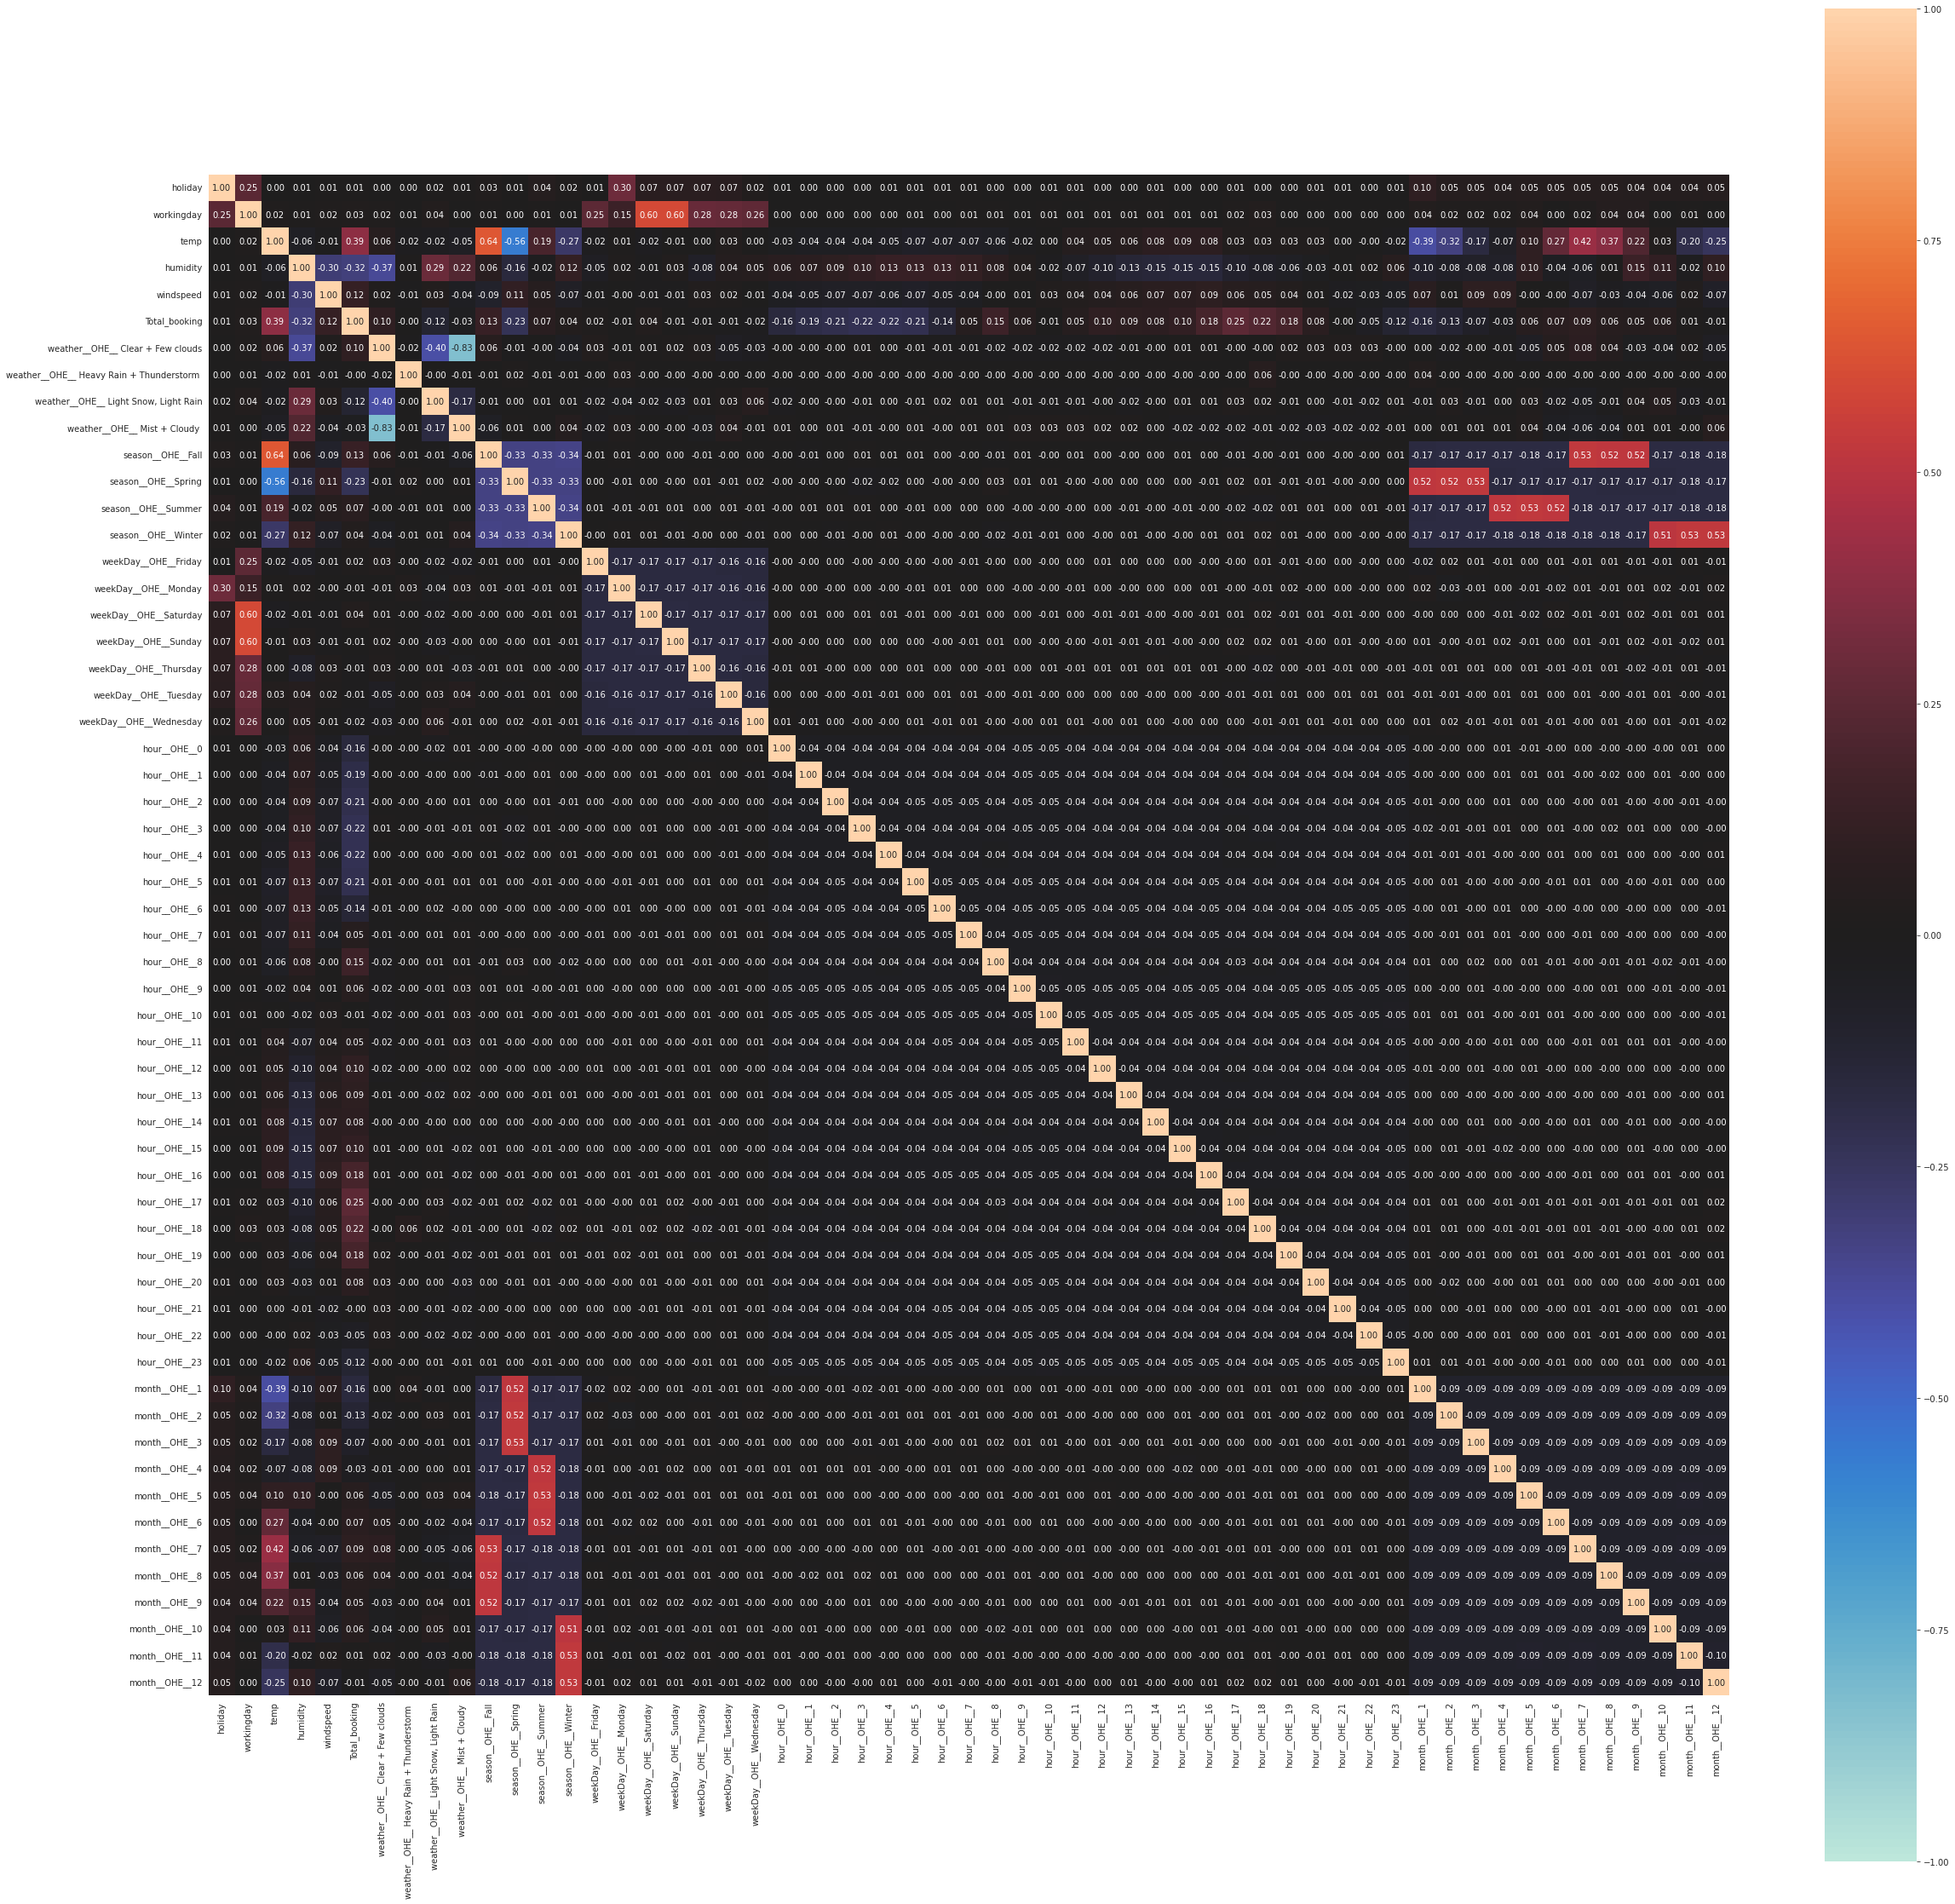

"fig, ax = plt.subplots(figsize=(25,25))\nsns.heatmap(df_train3.corr(),annot=True,fmt='.2f')"

In [60]:
df_train3=df_train_initial.copy()
df_train3=pd.get_dummies(df_train3,columns=['season','weekDay','hour','month'], prefix_sep="__OHE__")

df_test3=df_test_initial.copy()
df_test3=pd.get_dummies(df_test3,columns=['season','weekDay','hour','month'],prefix_sep="__OHE__")

fig, ax = plt.subplots(figsize=(40, 40))
nominal.associations(df_train3,ax=ax)
#Nominal columns association

'''fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(df_train3.corr(),annot=True,fmt='.2f')'''

[06:29:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


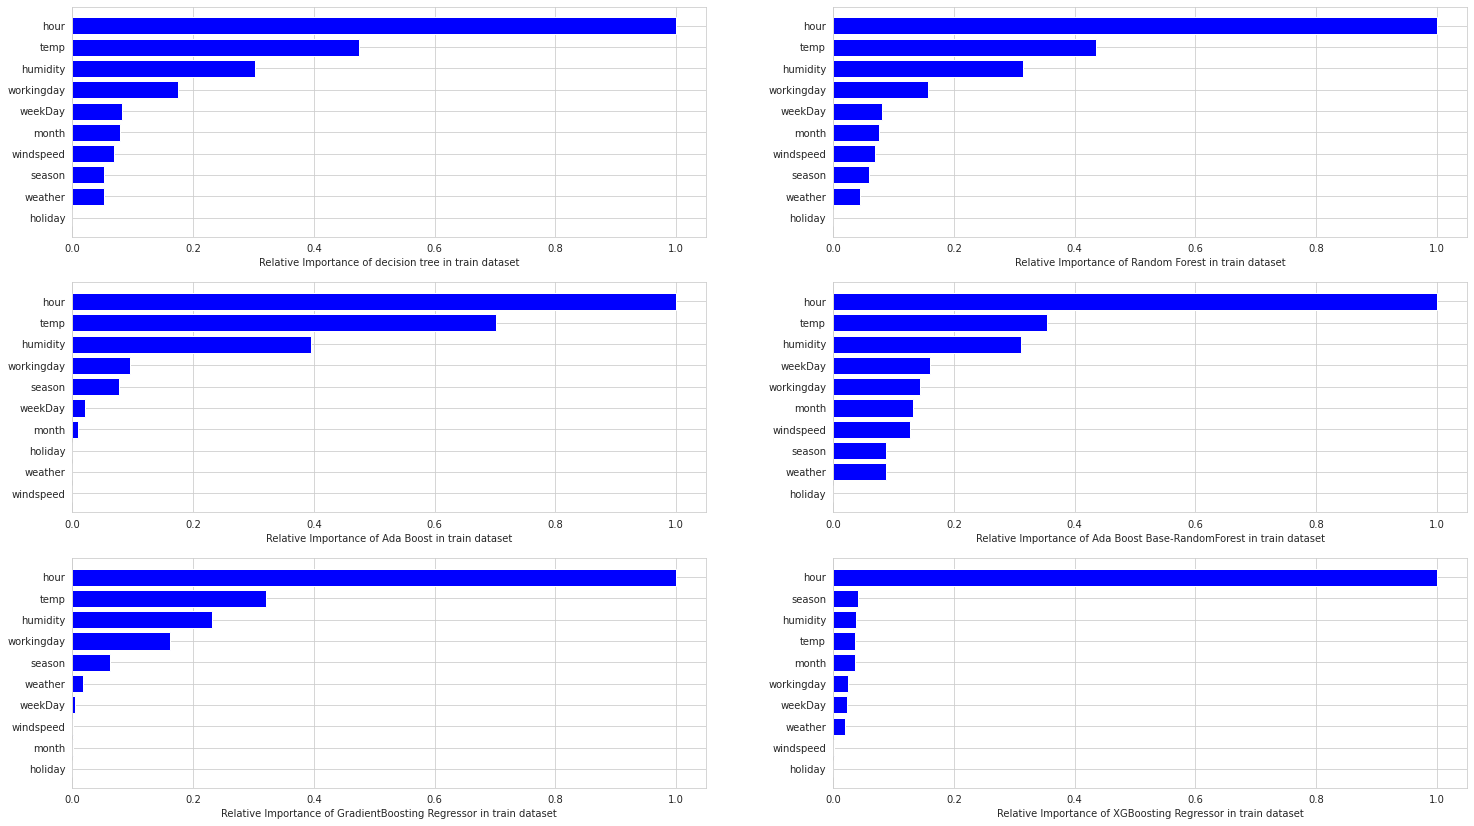

In [61]:
X4=df_train3.drop(['Total_booking'],axis=1).values
y4=df_train3['Total_booking'].values
Xtest4=df_test3.drop(['Total_booking'],axis=1).values
ytest4=df_test3['Total_booking'].values
columns_encoding=df_train3.drop(['Total_booking'],axis=1).columns
labels4=['Scenario 4','Scenario 4','Scenario 4','Scenario 4']
Metrics_encoding,TestMetrics_encoding=building_models(X4,y4,Xtest4,ytest4,columns_encoding,labels4)

In [62]:
Metrics_encoding

,Label,linear regression,decision tree,SVR,knn,naive bayes,Random Forest,Ada Boost,Ada Boost Base-RandomForest,Bagging Regressor,GradientBoosting Regressor,XGBoosting Regressor,MLPRegressor
Scenario 4,R2_score,0.643700,0.65010,0.33900,0.743600,0.646200,0.823700,0.284900,0.831000,0.806800,0.7299,0.724400,0.840400
Scenario 4,AdjustedR2_score,0.640665,0.64712,0.33337,0.741416,0.643187,0.822198,0.278809,0.829561,0.805154,0.7276,0.722053,0.839041
Scenario 4,MeanAbsoluteError,68.696200,57.34000,90.16890,53.473100,68.536200,44.683300,110.400100,46.903000,46.588100,59.0595,59.338300,44.391800
Scenario 4,RootMeanSquaredError,92.702200,91.85590,126.25780,78.638100,92.378500,65.207800,131.324800,63.833000,68.263300,80.7114,81.532500,62.043800


In [63]:
TestMetrics_encoding

,Label,linear regression,decision tree,SVR,knn,naive bayes,Random Forest,Ada Boost,Ada Boost Base-RandomForest,Bagging Regressor,GradientBoosting Regressor,XGBoosting Regressor,MLPRegressor
Scenario 4,R2_score,0.611600,0.675800,0.250900,0.727800,0.613400,0.815100,0.315200,0.822700,0.796500,0.705800,0.694400,0.830900
Scenario 4,AdjustedR2_score,0.601345,0.667240,0.231122,0.720613,0.603193,0.810218,0.297119,0.818019,0.791127,0.698032,0.686331,0.826435
Scenario 4,MeanAbsoluteError,80.136007,63.379706,102.678078,60.948209,79.991179,49.549170,119.340726,51.350684,52.174074,66.518566,67.468185,49.271388
Scenario 4,RootMeanSquaredError,111.798037,102.147629,155.263115,93.601077,111.538326,77.134510,148.453078,75.530570,80.929009,97.301890,99.172336,73.764142


* OneHotEncoding improved accuracy for linear regression,naivebaye's,MLPRegressor

### Metric Analysis

In [64]:
Final_Metrics=pd.concat([Metrics,Metrics1,Metrics2,Metrics_no_cyclic,Metrics_encoding])
Final_Metrics=Final_Metrics[(Final_Metrics['Label']=='RootMeanSquaredError')]# | (Final_Metrics['Label']=='AdjustedR2_score')]
Final_Metrics.drop('Label',axis=1,inplace=True)
Final_Metrics.sort_values(by = 'Scenario 1.1', axis = 1)

,Ada Boost Base-RandomForest,Random Forest,Bagging Regressor,GradientBoosting Regressor,XGBoosting Regressor,knn,MLPRegressor,decision tree,Ada Boost,linear regression,naive bayes,SVR
Scenario 1.1,57.5126,58.6557,63.7313,68.4408,68.6480,76.9392,79.4531,82.8724,105.2919,108.2468,108.3846,117.4492
Scenario 1.2,57.5865,58.5588,63.5383,68.4387,68.6480,76.6983,80.2218,81.2224,105.2919,108.4446,108.5313,116.6499
Scenario 2,57.7055,59.1176,63.4488,66.7435,67.4219,83.9646,78.4103,82.5674,106.0042,107.8695,107.8898,120.3651
Scenario 3,57.4490,59.1391,62.6207,68.6927,68.6632,102.0183,97.7436,84.6807,104.6464,120.0906,120.1349,130.1836
Scenario 4,63.8330,65.2078,68.2633,80.7114,81.5325,78.6381,62.0438,91.8559,131.3248,92.7022,92.3785,126.2578


In [65]:
TestFinal_Metrics=pd.concat([TestMetrics,TestMetrics1,TestMetrics2,TestMetrics_no_cyclic,TestMetrics_encoding])
TestFinal_Metrics=TestFinal_Metrics[(TestFinal_Metrics['Label']=='RootMeanSquaredError')]# | (TestFinal_Metrics['Label']=='AdjustedR2_score')]
TestFinal_Metrics.drop('Label',axis=1,inplace=True)
TestFinal_Metrics.sort_values(by = 'Scenario 1.1', axis = 1)

,Ada Boost Base-RandomForest,Random Forest,Bagging Regressor,XGBoosting Regressor,GradientBoosting Regressor,decision tree,knn,MLPRegressor,Ada Boost,naive bayes,linear regression,SVR
Scenario 1.1,71.468343,73.062719,75.863669,87.658799,88.063657,92.971734,99.488666,100.617687,122.761317,135.656628,135.709025,146.468224
Scenario 1.2,71.663978,73.229122,76.202239,87.658799,88.060311,93.696681,98.907927,101.231259,122.761317,135.630797,135.728895,145.686598
Scenario 2,71.211861,72.537327,74.861200,86.946964,85.951317,90.031159,108.767956,99.767507,122.091129,135.054030,134.996256,149.870933
Scenario 3,70.848543,72.630336,76.164813,89.022699,88.673577,91.415823,127.203904,122.794343,122.891787,145.482294,145.329327,158.618410
Scenario 4,75.530570,77.134510,80.929009,99.172336,97.301890,102.147629,93.601077,73.764142,148.453078,111.538326,111.798037,155.263115


In [66]:
Final_Metrics=pd.concat([Metrics,Metrics1,Metrics2,Metrics_no_cyclic,Metrics_encoding])
Final_Metrics=Final_Metrics[(Final_Metrics['Label']=='R2_score')]# | (Final_Metrics['Label']=='AdjustedR2_score')]
Final_Metrics.drop('Label',axis=1,inplace=True)
Final_Metrics.sort_values(by = 'Scenario 1.1', axis = 1,ascending=False)

,Ada Boost Base-RandomForest,Random Forest,Bagging Regressor,GradientBoosting Regressor,XGBoosting Regressor,knn,MLPRegressor,decision tree,Ada Boost,linear regression,naive bayes,SVR
Scenario 1.1,0.8628,0.8573,0.8316,0.8058,0.8046,0.7545,0.7382,0.7152,0.5403,0.5141,0.5129,0.4280
Scenario 1.2,0.8625,0.8578,0.8326,0.8058,0.8046,0.7561,0.7332,0.7265,0.5403,0.5124,0.5116,0.4358
Scenario 2,0.8619,0.8551,0.8331,0.8153,0.8115,0.7077,0.7451,0.7173,0.5341,0.5175,0.5173,0.3993
Scenario 3,0.8632,0.8550,0.8374,0.8043,0.8045,0.5684,0.6039,0.7027,0.5459,0.4020,0.4016,0.2973
Scenario 4,0.8310,0.8237,0.8068,0.7299,0.7244,0.7436,0.8404,0.6501,0.2849,0.6437,0.6462,0.3390


In [67]:
TestFinal_Metrics=pd.concat([TestMetrics,TestMetrics1,TestMetrics2,TestMetrics_no_cyclic,TestMetrics_encoding])
TestFinal_Metrics=TestFinal_Metrics[(TestFinal_Metrics['Label']=='R2_score')]# | (TestFinal_Metrics['Label']=='AdjustedR2_score')]
TestFinal_Metrics.drop('Label',axis=1,inplace=True)
TestFinal_Metrics.sort_values(by = 'Scenario 1.1', axis = 1,ascending=False)

,Ada Boost Base-RandomForest,Random Forest,Bagging Regressor,XGBoosting Regressor,GradientBoosting Regressor,decision tree,knn,MLPRegressor,Ada Boost,naive bayes,linear regression,SVR
Scenario 1.1,0.8413,0.8341,0.8212,0.7612,0.7590,0.7314,0.6924,0.6854,0.5317,0.4282,0.4277,0.3334
Scenario 1.2,0.8404,0.8334,0.8196,0.7612,0.7590,0.7272,0.6960,0.6816,0.5317,0.4284,0.4275,0.3405
Scenario 2,0.8424,0.8365,0.8259,0.7651,0.7704,0.7481,0.6324,0.6907,0.5368,0.4332,0.4337,0.3020
Scenario 3,0.8440,0.8361,0.8197,0.7537,0.7557,0.7403,0.4972,0.5314,0.5307,0.3423,0.3437,0.2182
Scenario 4,0.8227,0.8151,0.7965,0.6944,0.7058,0.6758,0.7278,0.8309,0.3152,0.6134,0.6116,0.2509


* Transforming hour,month into cos and sin and encoding season,weekDay improved accuracy for all tree based methods
* Encoding hour,month,season,weekDay improved accuracy for MLPRegressor,LinearRegression,NaiveBayes,knn and decreased for tree based methods
* Transforming hour,month,season,weekDay into cos and sin improved accuracy for knn,SVR
* Hour,temp.humidity,workingday features has more importance


#### We can observe that models build on RandomForest Regressor,Boosting algorithms,MLPRegressor gave best results

### Hyperparamater Tuning

In [40]:
df_train1=df_train_initial.copy()
df_train1=pd.get_dummies(df_train1,columns=['season','weekDay'], prefix_sep="__OHE__")
df_train1['hour_sin'] = np.sin(df_train1.hour*(2.*np.pi/24))
df_train1['hour_cos'] = np.cos(df_train1.hour*(2.*np.pi/24))
df_train1['month_sin'] = np.sin((df_train1.month-1)*(2.*np.pi/12))
df_train1['month_cos'] = np.cos((df_train1.month-1)*(2.*np.pi/12))
df_train1.drop(['hour','month'],axis=1,inplace=True)

df_test1=df_test_initial.copy()
df_test1=pd.get_dummies(df_test1,columns=['season','weekDay'], prefix_sep="__OHE__")
df_test1['hour_sin'] = np.sin(df_test1.hour*(2.*np.pi/24))
df_test1['hour_cos'] = np.cos(df_test1.hour*(2.*np.pi/24))
df_test1['month_sin'] = np.sin((df_test1.month-1)*(2.*np.pi/12))
df_test1['month_cos'] = np.cos((df_test1.month-1)*(2.*np.pi/12))
df_test1.drop(['hour','month'],axis=1,inplace=True)

X2=df_train1.drop(['Total_booking'],axis=1).values
y2=df_train1['Total_booking'].values
Xtest2=df_test1.drop(['Total_booking'],axis=1).values
ytest2=df_test1['Total_booking'].values
X_train2,X_test2,Y_train2,Y_test2=train_test_split(X2,y2,test_size=0.2,random_state=41)

scaler2 = StandardScaler().fit(X_train2)
train_sc2 = scaler2.transform(X_train2)
test_sc2 = scaler2.transform(X_test2)
final_test_sc2=scaler2.transform(Xtest2)

RandomForest

In [47]:
model_params = {'n_estimators':[100,300,500,1000], 'max_features':['sqrt',None],'min_samples_split':range(2,5),'min_samples_leaf':range(1,3),}
model_rfr_cv = GridSearchCV(RandomForestRegressor(random_state=48),model_params,cv=5,n_jobs=-1,verbose=True)
model_rfr_cv.fit(train_sc2,Y_train2)
model_rfr_cv.best_params_,model_rfr_cv.best_estimator_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


({'max_features': None,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 500},
 RandomForestRegressor(max_features=None, n_estimators=500, random_state=48))

In [48]:
rfr_best=model_rfr_cv.best_estimator_
M_rfr=rfr_best.fit(train_sc2,Y_train2)
Y_pred1=M_rfr.predict(test_sc2)
rfrRMSE=mean_squared_error(Y_test2,Y_pred1,squared=False)
rfrR2Score=round(r2_score(Y_test2, Y_pred1),4)
rfrAdjustedR2Score=1-(1-rfrR2Score)*(train_sc2.shape[0]-1)/(train_sc2.shape[0]-train_sc2.shape[1]-1)
print(rfrRMSE,rfrR2Score,rfrAdjustedR2Score)

59.00219416857923 0.8557 0.8551758286665658


In [49]:
TestY_predrcf=M_rfr.predict(final_test_sc2)
TestrcfRMSE=mean_squared_error(ytest2,TestY_predrcf,squared=False)
TestrcfR2Score=round(r2_score(ytest2, TestY_predrcf),4)
TestrcfAdjustedR2Score=1-(1-TestrcfR2Score)*(train_sc2.shape[0]-1)/(train_sc2.shape[0]-train_sc2.shape[1]-1)
print(TestrcfRMSE,TestrcfR2Score,TestrcfAdjustedR2Score)

72.48697670590742 0.8367 0.8361068109580747


AdaBoost

In [44]:
model_params = {'n_estimators': [100, 500, 1000],'learning_rate':[0.0001, 0.001, 0.01, 0.1,1.0]}
model_abrr_cv = GridSearchCV(AdaBoostRegressor(random_state=48),model_params,cv=5,n_jobs=None,verbose=True)
start_time = timeit.default_timer()
model_abrr_cv.fit(train_sc2,Y_train2)
elapsed = timeit.default_timer() - start_time
print("Time taken to perform cv for the model in sec is ",elapsed)


Fitting 5 folds for each of 15 candidates, totalling 75 fits
Time taken to perform cv for the model in sec is  292.71070917600014


In [46]:
model_abrr_cv.best_params_,model_abrr_cv.best_score_

({'learning_rate': 0.01, 'n_estimators': 500}, 0.5719595307707441)

In [43]:
abr_best=model_abrr_cv.best_estimator_
M_abr=abr_best.fit(train_sc2,Y_train2)
Y_predabr=M_abr.predict(test_sc2)
RMSEabr=mean_squared_error(Y_test2,Y_predabr,squared=False)
abrR2Score=round(r2_score(Y_test2, Y_predabr),4)
abrAdjustedR2Score=1-(1-abrR2Score)*(train_sc2.shape[0]-1)/(train_sc2.shape[0]-train_sc2.shape[1]-1)
print(RMSEabr,abrR2Score,abrAdjustedR2Score)

TestY_pred1=M_abr.predict(final_test_sc2)
TestabrRMSE=mean_squared_error(ytest2,TestY_pred1,squared=False)
TestabrR2Score=round(r2_score(ytest2, TestY_pred1),4)
TestabrAdjustedR2Score=1-(1-TestabrR2Score)*(train_sc2.shape[0]-1)/(train_sc2.shape[0]-train_sc2.shape[1]-1)
print(TestabrRMSE,TestabrR2Score,TestabrAdjustedR2Score)

97.70079857634765 0.6042 0.6027622521568033
120.71091439400624 0.5472 0.5455551990313304


Taking KNN Best model and doing Hyperparameter tuning

In [ ]:
df_train3=df_train_initial.copy()
df_train3=pd.get_dummies(df_train3,columns=['season','weekDay','hour','month'], prefix_sep="__OHE__")

df_test3=df_test_initial.copy()
df_test3=pd.get_dummies(df_test3,columns=['season','weekDay','hour','month'],prefix_sep="__OHE__")
X3=df_train3.drop(['Total_booking'],axis=1).values
y3=df_train3['Total_booking'].values
Xtest3=df_test3.drop(['Total_booking'],axis=1).values
ytest3=df_test3['Total_booking'].values
X_train,X_test,Y_train,Y_test=train_test_split(X3,y3,test_size=0.2,random_state=41)

scaler = StandardScaler().fit(X_train)
train_sc = scaler.transform(X_train)
test_sc = scaler.transform(X_test)
final_test_sc=scaler.transform(Xtest3)

In [ ]:
model_params = {'n_neighbors':range(1,9),'weights':['uniform','distance'],'p':[1,2]}
model_knn_cv = GridSearchCV(KNeighborsRegressor(),model_params,cv=5,n_jobs=-1,verbose=True)
model_knn_cv.fit(train_sc,Y_train)
model_knn_cv.best_params_,model_knn_cv.best_estimator_

Fitting 5 folds for each of 32 candidates, totalling 160 fits


({'n_neighbors': 7, 'p': 1, 'weights': 'distance'},
 KNeighborsRegressor(n_neighbors=7, p=1, weights='distance'))

In [ ]:
knn_best=model_knn_cv.best_estimator_
M_knn=rfr_best.fit(train_sc,Y_train)
Y_pred1=M_knn.predict(test_sc)
knnRMSE=mean_squared_error(Y_test,Y_pred1,squared=False)
knnR2Score=round(r2_score(Y_test, Y_pred1),4)
knnAdjustedR2Score=1-(1-knnR2Score)*(train_sc.shape[0]-1)/(train_sc.shape[0]-train_sc.shape[1]-1)
print(knnRMSE,knnR2Score,knnAdjustedR2Score)

64.75662386135636 0.8261 0.8246188745247147


In [ ]:
TestY_pred1=M_knn.predict(final_test_sc)
TestknnRMSE=mean_squared_error(ytest3,TestY_pred1,squared=False)
TestknnR2Score=round(r2_score(ytest3, TestY_pred1),4)
TestknnAdjustedR2Score=1-(1-TestknnR2Score)*(train_sc.shape[0]-1)/(train_sc.shape[0]-train_sc.shape[1]-1)
print(TestknnRMSE,TestknnR2Score,TestknnAdjustedR2Score)

77.16422007324601 0.815 0.8134243346007604


Taking Best MLPRegressor model and increase layers for tuning

In [ ]:
M_MLP=MLPRegressor(hidden_layer_sizes=(100,100,100)).fit(train_sc,Y_train)
Y_pred1=M_MLP.predict(test_sc)
MLPRMSE=mean_squared_error(Y_test,Y_pred1,squared=False)
MLPR2Score=round(r2_score(Y_test, Y_pred1),4)
MLPAdjustedR2Score=1-(1-MLPR2Score)*(train_sc.shape[0]-1)/(train_sc.shape[0]-train_sc.shape[1]-1)
print(MLPRMSE,MLPR2Score,MLPAdjustedR2Score)

TestY_pred1=M_MLP.predict(final_test_sc)
TestMLPRMSE=mean_squared_error(ytest3,TestY_pred1,squared=False)
TestMLPR2Score=round(r2_score(ytest3, TestY_pred1),4)
TestMLPAdjustedR2Score=1-(1-TestMLPR2Score)*(train_sc.shape[0]-1)/(train_sc.shape[0]-train_sc.shape[1]-1)
print(TestMLPRMSE,TestMLPR2Score,TestMLPAdjustedR2Score)

65.50469401081592 0.8221 0.8205848060836503
74.64757981341427 0.8268 0.8253248365019011


* Hyperparameter tuning improved accuracy slightly for Adaboost and very little for RandomForest as RandomForest is already good algorithm
* Hyperparameter tuning improves accuracy for knn
* Increasing layers didn't increase accuracy for MLPRegressor